#  Project Name: House Price Prediction using Time Series Analysis

## A project by TEAM 008:

### PES2UG20CS201: Md. Sayeed Akram
### PES2UG20CS240: Parth Praveen Shetty
### PES2UG20CS260: Raghav Chugh



## Load the Data/Import Libraries

In [460]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

import itertools
import pandas as pd
import numpy as np

#for modeling
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose as sd

import matplotlib.pyplot as plt
import seaborn as sns


In [430]:
df = pd.read_csv('./data/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [431]:
ny=df[(df['City']=='New York')]
ny.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


In [432]:
area = pd.read_csv('./data/manhattan_brooklyn_zip.csv')
area.head()

,RegionName,District
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan


In [433]:
ny1 = pd.merge(ny, area, how='left', on='RegionName')
ny1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,District
0,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,400000,407300,411600,413200,414300,413900,411400,413200,417900,NaN
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,Brooklyn
2,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,NaN
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,777300,788800,793900,796000,799700,806600,810600,813400,816200,Brooklyn
4,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300,Manhattan


In [434]:
ny2 = ny1[ny1['District'].notnull()]
ny2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,District
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,Brooklyn
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,777300,788800,793900,796000,799700,806600,810600,813400,816200,Brooklyn
4,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300,Manhattan
5,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,Manhattan
9,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400,Brooklyn


In [435]:
ny2.groupby('District').count()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
District,,,,,,,,,,,,,,,,,,,,,
Brooklyn,29,29,29,29,29,29,29,25,25,25,...,29,29,29,29,29,29,29,29,29,29
Manhattan,4,4,4,4,4,4,4,1,1,1,...,4,4,4,4,4,4,4,4,4,4


Only 4 zipcodes in Manhattan are present in the database. 
We will focus on Brooklyn in order to make out trends properly. 

In [436]:
ny3 = ny2[ny2['District']=='Brooklyn']
ny3.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,District
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,Brooklyn
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,777300,788800,793900,796000,799700,806600,810600,813400,816200,Brooklyn
9,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400,Brooklyn
10,62020,11209,New York,NY,New York,Kings,50,255700.0,256600.0,257300.0,...,1013400,1019500,1024400,1024900,1018900,1023500,1029200,1023000,1015800,Brooklyn
11,62023,11212,New York,NY,New York,Kings,54,125000.0,125000.0,125000.0,...,387000,394600,401500,407900,414900,422300,426300,427100,428400,Brooklyn


In [437]:
ny4 = ny3.drop(['RegionID','City','State','Metro','CountyName','SizeRank','District'], axis ='columns')

In [438]:
ny4.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1,11226,162000.0,162300.0,162600.0,163000.0,163400.0,164000.0,164700.0,165700.0,166800.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
3,11235,190500.0,191000.0,191500.0,192000.0,192500.0,193000.0,193600.0,194300.0,195300.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
9,11230,230100.0,230800.0,231500.0,232100.0,232800.0,233600.0,234700.0,235900.0,237500.0,...,1079200,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400
10,11209,255700.0,256600.0,257300.0,258100.0,258900.0,259800.0,260900.0,262000.0,263600.0,...,1005000,1013400,1019500,1024400,1024900,1018900,1023500,1029200,1023000,1015800
11,11212,125000.0,125000.0,125000.0,125000.0,125100.0,125100.0,125000.0,124800.0,124600.0,...,380000,387000,394600,401500,407900,414900,422300,426300,427100,428400


In [439]:
ny4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 72
Columns: 266 entries, RegionName to 2018-04
dtypes: float64(219), int64(47)
memory usage: 60.5 KB


In [440]:
ny4.dtypes

RegionName      int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
               ...   
2017-12         int64
2018-01         int64
2018-02         int64
2018-03         int64
2018-04         int64
Length: 266, dtype: object

## Reshaping df & Data Processing

In [441]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='Month', value_name = 'Value')
    melted['Month'] = pd.to_datetime(melted['Month'])
    melted = melted.dropna(subset=['Value'])
    return melted

In [442]:
dfm = melt_data(ny4)

In [443]:
dfm.head()

,RegionName,Month,Value
0,11226,1996-04-01,162000.0
1,11235,1996-04-01,190500.0
2,11230,1996-04-01,230100.0
3,11209,1996-04-01,255700.0
4,11212,1996-04-01,125000.0


In [444]:
dfm.tail()

,RegionName,Month,Value
7680,11222,2018-04-01,1721100.0
7681,11205,2018-04-01,2248400.0
7682,11217,2018-04-01,3656000.0
7683,11231,2018-04-01,3044500.0
7684,11228,2018-04-01,915300.0


In [445]:
dfm.set_index('Month', inplace = True)

In [446]:
dfm.head(10)

,RegionName,Value
Month,,
1996-04-01,11226,162000.0
1996-04-01,11235,190500.0
1996-04-01,11230,230100.0
1996-04-01,11209,255700.0
1996-04-01,11212,125000.0
1996-04-01,11214,191000.0
1996-04-01,11221,133700.0
1996-04-01,11229,183900.0
1996-04-01,11234,172300.0


In [447]:
tmp=dfm
tmp.head(10)

,RegionName,Value
Month,,
1996-04-01,11226,162000.0
1996-04-01,11235,190500.0
1996-04-01,11230,230100.0
1996-04-01,11209,255700.0
1996-04-01,11212,125000.0
1996-04-01,11214,191000.0
1996-04-01,11221,133700.0
1996-04-01,11229,183900.0
1996-04-01,11234,172300.0


In [448]:
dfm=dfm[:'2017']
dfm.tail()

,RegionName,Value
Month,,
2017-12-01,11222,1651200.0
2017-12-01,11205,2251000.0
2017-12-01,11217,3404100.0
2017-12-01,11231,2961600.0
2017-12-01,11228,902200.0


## EDA


In [449]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7197 entries, 1996-04-01 to 2017-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  7197 non-null   int64  
 1   Value       7197 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 168.7 KB


In [450]:
dfm.describe()

,RegionName,Value
count,7197.000000,7.197000e+03
mean,11220.256774,5.996332e+05
std,9.949368,4.821741e+05
min,11203.000000,1.245000e+05
25%,11212.000000,2.870000e+05
50%,11220.000000,4.800000e+05
75%,11229.000000,6.964000e+05
max,11238.000000,3.443800e+06


In [451]:
dfm.isnull().sum()

RegionName    0
Value         0
dtype: int64

In [452]:

n=len(dfm.columns)
sm=0
for i in range (0, n):
    k=dfm.columns[i]
    sm+=(dfm[k]==0).sum()
print("Incorrect:",sm)


Incorrect: 0


### Let's visualise

<AxesSubplot:xlabel='RegionName', ylabel='Value'>

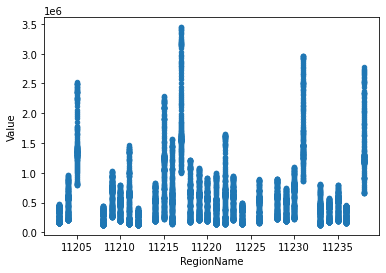

In [453]:
dfm.plot(x="RegionName",y="Value", kind="scatter")

Month
1996-04-01    AxesSubplot(0.125,0.2;0.775x0.68)
1996-05-01    AxesSubplot(0.125,0.2;0.775x0.68)
1996-06-01    AxesSubplot(0.125,0.2;0.775x0.68)
1996-07-01    AxesSubplot(0.125,0.2;0.775x0.68)
1996-08-01    AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
2017-08-01    AxesSubplot(0.125,0.2;0.775x0.68)
2017-09-01    AxesSubplot(0.125,0.2;0.775x0.68)
2017-10-01    AxesSubplot(0.125,0.2;0.775x0.68)
2017-11-01    AxesSubplot(0.125,0.2;0.775x0.68)
2017-12-01    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Value, Length: 261, dtype: object

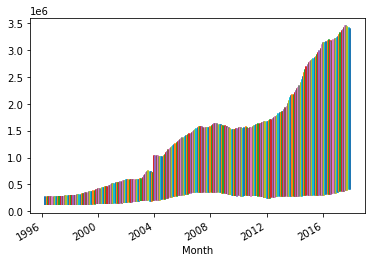

In [454]:
dfffn=dfm.groupby('Month')['Value']
dfffn.head()
dfffn.plot()

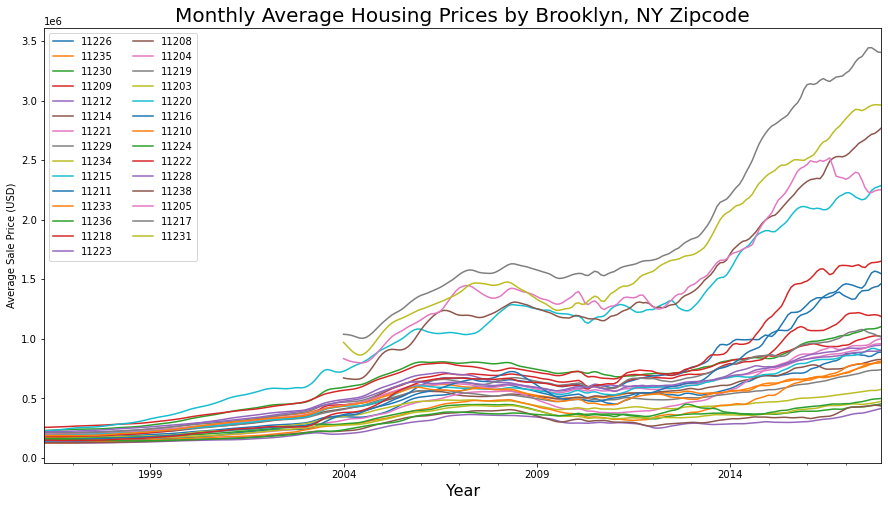

In [455]:
for zipcode in dfm.RegionName.unique():
    temp_df = dfm[dfm.RegionName == zipcode]
    temp_df['Value'].plot(figsize = (15,8), label=zipcode)

plt.legend(loc='upper left', ncol=2)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average Sale Price (USD)")
plt.title('Monthly Average Housing Prices by Brooklyn, NY Zipcode', fontsize = 20);


### Inference:
- 25 zip codes have data from 1996 to 2018, however, 4 zip codes do not
- There was a dip in 2008 and 2010 because of the financial crisis, housing price became stable around 2011.

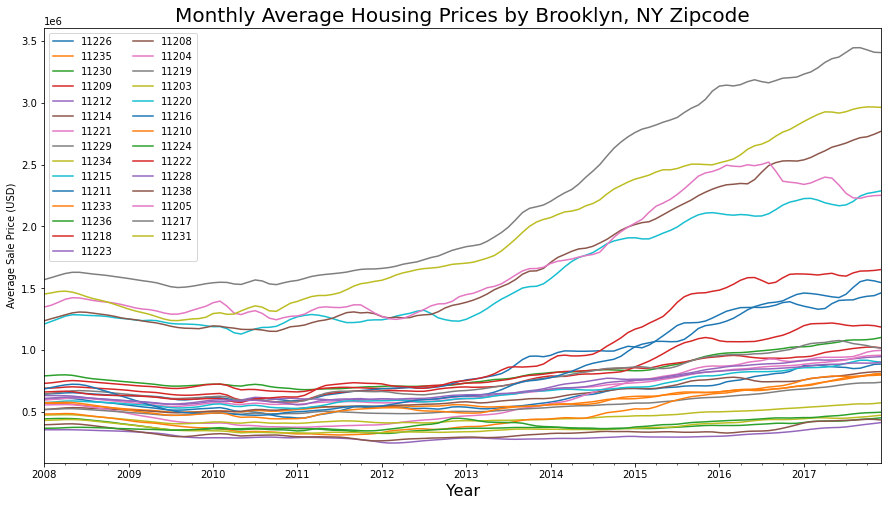

In [456]:
#A deeper look at 2008 above
for zipcode in dfm.RegionName.unique():
    temp_df = dfm[dfm.RegionName == zipcode]
    temp_df['2008':]['Value'].plot(figsize = (15,8), label=zipcode)

plt.legend( loc='upper left', ncol=2)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average Sale Price (USD)")
plt.title('Monthly Average Housing Prices by Brooklyn, NY Zipcode', fontsize = 20);


<AxesSubplot:xlabel='Month'>

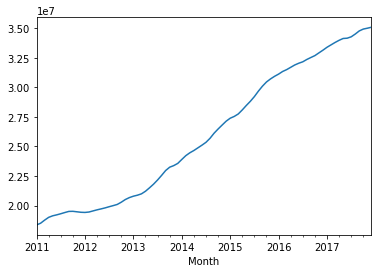

In [461]:
df2011 = dfm['2011':]
df2011 = df2011.groupby('Month')['Value'].sum()
df2011.plot()


To get more accurate prediction on 2020 and onwards data,  we decided to use data 2011-Present. 

In [462]:
df2011 = dfm['2011':]
month_avg = df2011.groupby('Month')['Value'].mean()

In [463]:
month_avg.head()

Month
2011-01-01    633365.517241
2011-02-01    638334.482759
2011-03-01    647358.620690
2011-04-01    655465.517241
2011-05-01    659955.172414
Name: Value, dtype: float64

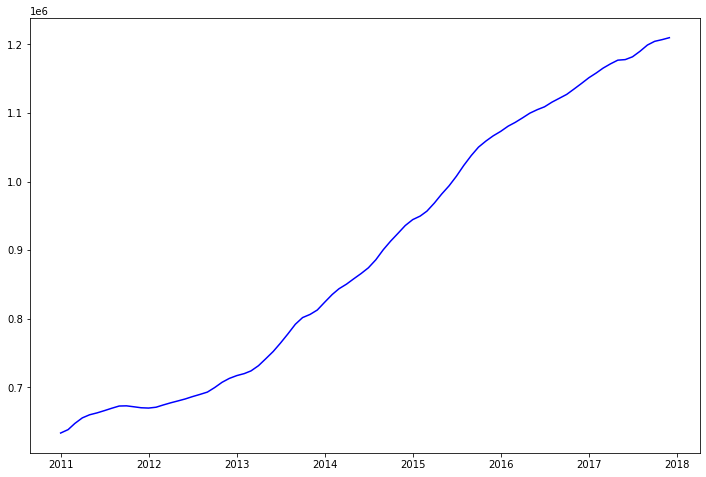

In [464]:
decomposition = sm.tsa.seasonal_decompose(month_avg, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal

# Plot gathered stats
plt.figure(figsize=(12,8))
plt.plot(month_avg, label='Original', color='blue')




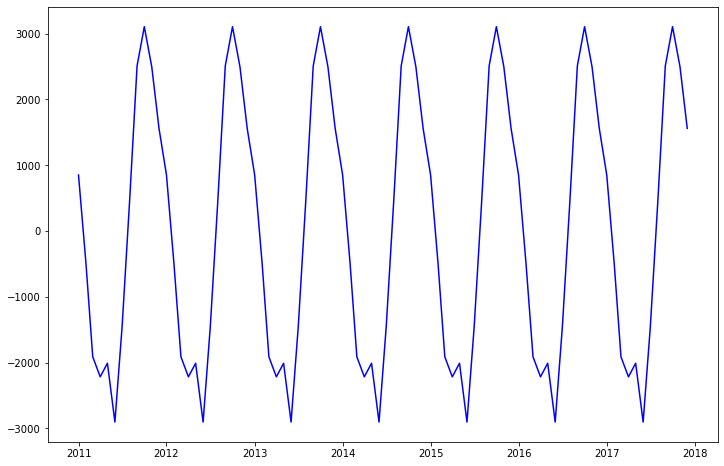

In [465]:

plt.figure(figsize=(12,8))
plt.plot(seasonal,label='Seasonality', color='blue')


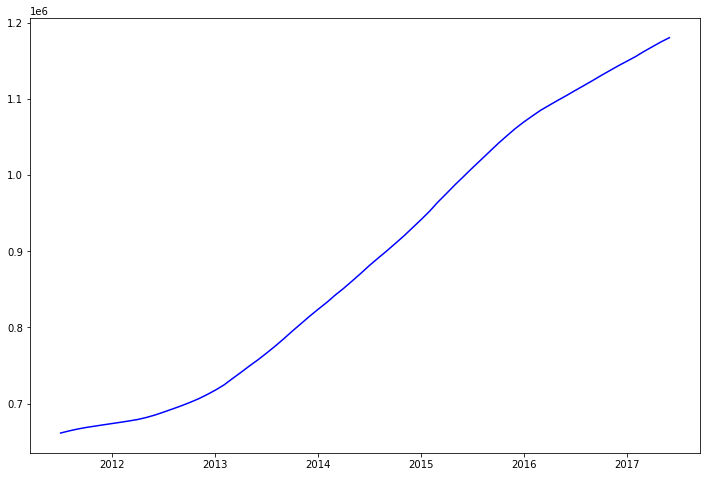

In [466]:

plt.figure(figsize=(12,8))
plt.plot(trend, label='Trend', color='blue')


An upward trend is present with yearly sesasonal changes. 

<AxesSubplot:xlabel='Month'>

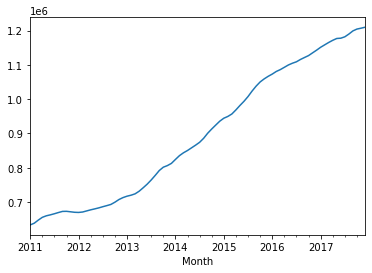

In [467]:
month_avg.plot()

#### SARIMA Models on Sample Zip Codes

In [468]:
dfm.RegionName.unique()

array([11226, 11235, 11230, 11209, 11212, 11214, 11221, 11229, 11234,
       11215, 11211, 11233, 11236, 11218, 11223, 11208, 11204, 11219,
       11203, 11220, 11216, 11210, 11224, 11222, 11228, 11238, 11205,
       11217, 11231], dtype=int64)

In [469]:
dfm.head()

,RegionName,Value
Month,,
1996-04-01,11226,162000.0
1996-04-01,11235,190500.0
1996-04-01,11230,230100.0
1996-04-01,11209,255700.0
1996-04-01,11212,125000.0


In [470]:
#Selecting 3 zipcodes
zip_dfs = []
zip_list = np.array([11231,11205,11217])
for x in zip_list:
    zip_dfs.append(pd.DataFrame(tmp[tmp['RegionName']==x][['Value']]))
print(zip_dfs)

[                Value
Month                
2004-01-01   969500.0
2004-02-01   940900.0
2004-03-01   912300.0
2004-04-01   887300.0
2004-05-01   869900.0
...               ...
2017-12-01  2961600.0
2018-01-01  2965300.0
2018-02-01  2974000.0
2018-03-01  3004000.0
2018-04-01  3044500.0

[172 rows x 1 columns],                 Value
Month                
2004-01-01   833100.0
2004-02-01   821400.0
2004-03-01   812000.0
2004-04-01   805500.0
2004-05-01   801400.0
...               ...
2017-12-01  2251000.0
2018-01-01  2251600.0
2018-02-01  2245300.0
2018-03-01  2243700.0
2018-04-01  2248400.0

[172 rows x 1 columns],                 Value
Month                
2004-01-01  1037600.0
2004-02-01  1035300.0
2004-03-01  1031400.0
2004-04-01  1024000.0
2004-05-01  1014300.0
...               ...
2017-12-01  3404100.0
2018-01-01  3413800.0
2018-02-01  3482900.0
2018-03-01  3588100.0
2018-04-01  3656000.0

[172 rows x 1 columns]]


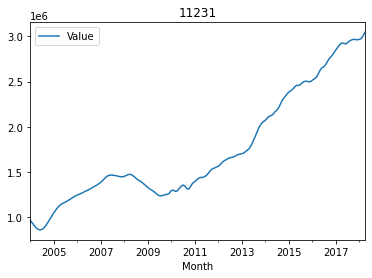

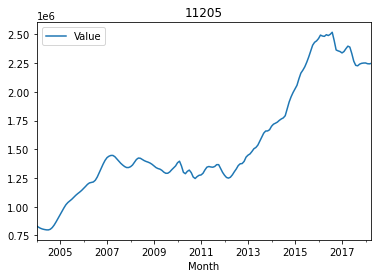

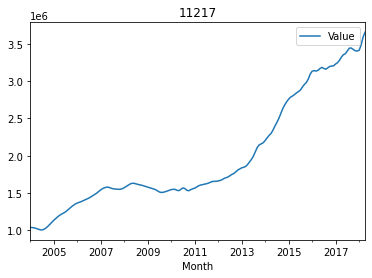

In [471]:
for df, name in zip(zip_dfs, zip_list):
    df.plot()
    plt.title(name)
    plt.show()

In [472]:
p = d = q = range(0,2) #randomly 1 and 0s to be assigned for 3 vars

In [473]:
pdq = list(itertools.product(p,d,q)) #for pnc
print(pdq) #for arima

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [474]:
# Generate all different combinations of seasonal p, d and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # since it's seasonal
#for seasonal arima... sarima 

In [475]:
print(pdqs)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [476]:
#Run SARIMA
ans = []

for df, name in zip(zip_dfs, zip_list): # for pairing lists 
    #df has dataframe and name has region names
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False, # to transform the AR parameters to enforce stationarity
                                                enforce_invertibility = False) # to transform the MA parameters to invertibility stationarity
                output = mod.fit() 
                
                ans.append([name, para1, para2, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue
    

Result for 11231 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 5423.9708093629815
Result for 11231 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4953.349680081502
Result for 11231 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4343.500124754707
Result for 11231 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3964.1793651810667
Result for 11231 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4224.726704777125
Result for 11231 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4167.708544128685
Result for 11231 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3911.0932416918577
Result for 11231 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3886.920566948442
Result for 11231 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 5271.202299206425
Result for 11231 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4873.6879132943195
Result for 11231 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4438.507909420658
Result for 11231 ARIMA (0, 0

Result for 11205 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3479.568836425222
Result for 11205 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3377.4131412999686
Result for 11205 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3330.584056201541
Result for 11205 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 3930.0629066955735
Result for 11205 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 7230.066270152053
Result for 11205 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 3762.733474314592
Result for 11205 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3509.416941497171
Result for 11205 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 3662.7909309470488
Result for 11205 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 6730.908640279653
Result for 11205 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3456.6741236967073
Result for 11205 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3457.7007449293424
Result for 11205 ARIMA (1, 

Result for 11217 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3467.876691832288
Result for 11217 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3161.8845620785296
Result for 11217 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3359.650223736454
Result for 11217 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3339.898847141606
Result for 11217 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3183.499383179954
Result for 11217 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3163.816347669129


In [428]:
result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])
result.head()

,name,pdq,pdqs,AIC


Akaike Information Critera (AIC) 

In [272]:
#Return the best set AIC i.e. with least vals for every reg name
best_para = result.loc[result.groupby("name")["AIC"].idxmin()]

In [273]:
best_para

,name,pdq,pdqs,AIC
127,11205,"(1, 1, 1)","(1, 1, 1, 12)",3275.267959
187,11217,"(1, 1, 1)","(0, 1, 1, 12)",3161.884562
63,11231,"(1, 1, 1)","(1, 1, 1, 12)",3114.322528


In [477]:
tmp['2017':]['Value'].mean()

1195787.9310344828

### Make dynamic forecast using data up to 2017-06-01 and compare with real values post 2017-06-01

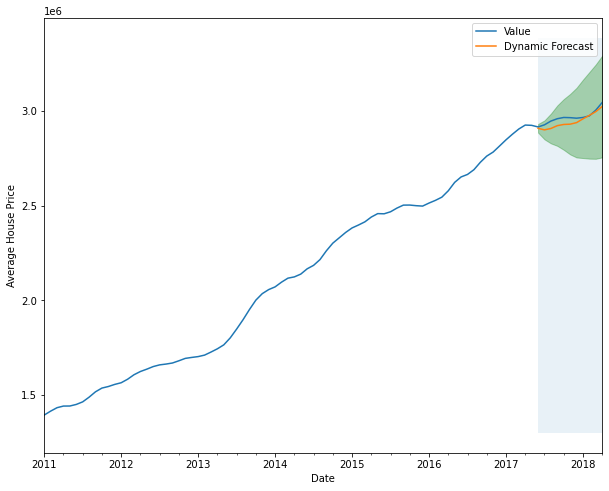

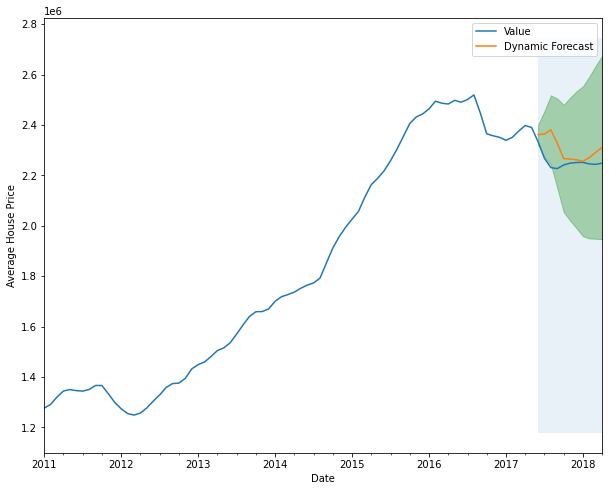

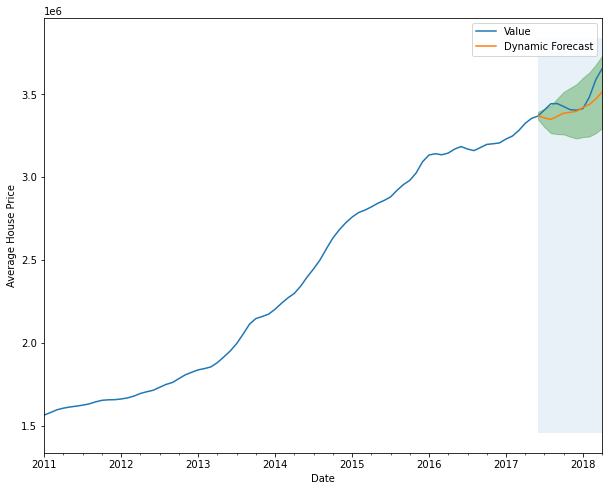

In [478]:
#import warnings

#Make Prediction post 2016 and compare with real values
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []

for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
    fore=0
    pred=0
    ARIMA_MODEL = sm.tsa.SARIMAX(df,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)
                                
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    #get dynamic predictions starting 2017-06-01
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int() #confidence interval
    #basically range of estimates for unknown parameters
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = df['2017-06-01':]['Value']
    
    #print(zip_forecasted,zip_truth)
    fore=zip_forecasted+fore
    pred=zip_truth+pred
    #act.append(zip_truth)
    #pred.append(zip_forecasted)
    #diff.append(zip_truth-zip_forecasted)
    #acc.append(100-((zip_truth-zip_forecasted)/zip_truth)*100)
    #Plot the dynamic forecast with confidence intervals as above
    ax = df['2011':].plot(label='observed', figsize=(10, 8))
    pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

    ax.fill_between(pred_dynamic_conf.index,
                    pred_dynamic_conf.iloc[:, 0],
                    pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-06-01'), zip_forecasted.index[-1], alpha=.1, zorder=-1)

    ax.set_xlabel('Date')
    ax.set_ylabel('Average House Price')

    plt.legend()
    plt.show()
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    #print('The Mean Squared Error of our forecasts is {}'.format(round(sqrt_mse, 2))) 
    
    #print("Accuracy is: ", 100-(abs(fore-pred))/fore,"%")
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value


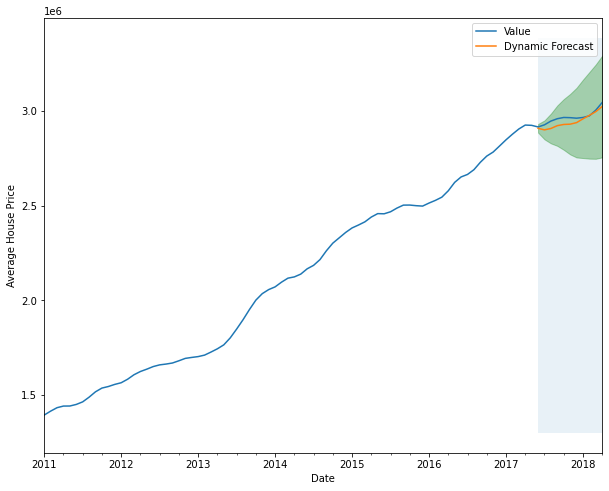

Accuracy Rate for 11203  is:  99.25432487327431 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  2.908104e+06  2915300.0   7195.605534    0.246822  99.753178
2017-07-01  2.899936e+06  2926600.0  26664.268145    0.911101  99.088899
2017-08-01  2.907220e+06  2946300.0  39080.010953    1.326410  98.673590
2017-09-01  2.922160e+06  2958800.0  36639.710318    1.238330  98.761670
2017-10-01  2.928479e+06  2965400.0  36921.218739    1.245067  98.754933
2017-11-01  2.929989e+06  2964400.0  34410.817244    1.160802  98.839198
2017-12-01  2.938164e+06  2961600.0  23435.917351    0.791326  99.208674
2018-01-01  2.958045e+06  2965300.0   7254.697118    0.244653  99.755347
2018-02-01  2.976497e+06  2974000.0   2496.589344    0.083947  99.916053
2018-03-01  2.996268e+06  3004000.0   7731.623963    0.257378  99.742622
2018-04-01  3.023292e+06  3044500.0  21207.701981    0.696591  99.303409


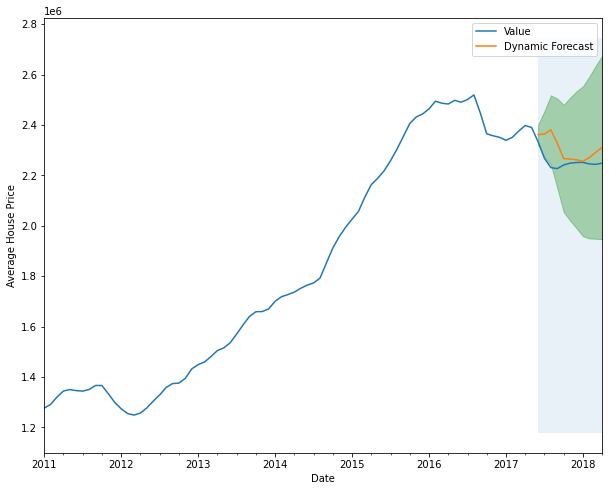

Accuracy Rate for 11204  is:  97.70556373282243 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  2.361645e+06  2333600.0   28044.890577    1.201787  98.798213
2017-07-01  2.364021e+06  2267400.0   96621.116230    4.261318  95.738682
2017-08-01  2.380230e+06  2230800.0  149429.859228    6.698488  93.301512
2017-09-01  2.326954e+06  2226800.0  100154.080073    4.497668  95.502332
2017-10-01  2.266688e+06  2241400.0   25287.919236    1.128220  98.871780
2017-11-01  2.264479e+06  2248400.0   16078.587582    0.715112  99.284888
2017-12-01  2.261984e+06  2251000.0   10983.504697    0.487939  99.512061
2018-01-01  2.255862e+06  2251600.0    4262.301096    0.189301  99.810699
2018-02-01  2.270876e+06  2245300.0   25576.418925    1.139109  98.860891
2018-03-01  2.291801e+06  2243700.0   48100.798789    2.143816  97.856184
2018-04-01  2.310817e+06  2248400.0   62416.518133    2.776042  97.223958


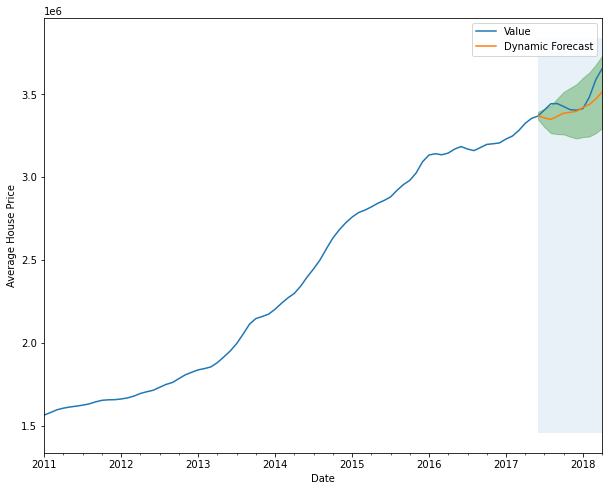

Accuracy Rate for 11205  is:  98.46376496381922 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  3.371162e+06  3368600.0    2562.419393    0.076068  99.923932
2017-07-01  3.357180e+06  3405900.0   48719.785386    1.430453  98.569547
2017-08-01  3.348501e+06  3442900.0   94399.305747    2.741854  97.258146
2017-09-01  3.367158e+06  3443800.0   76642.461002    2.225520  97.774480
2017-10-01  3.386331e+06  3426000.0   39669.445984    1.157894  98.842106
2017-11-01  3.391019e+06  3407000.0   15981.466394    0.469077  99.530923
2017-12-01  3.397058e+06  3404100.0    7041.759926    0.206861  99.793139
2018-01-01  3.420689e+06  3413800.0    6888.953468    0.201797  99.798203
2018-02-01  3.438468e+06  3482900.0   44432.373314    1.275729  98.724271
2018-03-01  3.471740e+06  3588100.0  116359.866371    3.242938  96.757062
2018-04-01  3.514498e+06  3656000.0  141501.581843    3.870393  96.129607


In [479]:
#import warnings

#Make Prediction post 2016 and compare with real values
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []

for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
    fore=0
    pred=0
    ARIMA_MODEL = sm.tsa.SARIMAX(df,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)
                                
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    #get dynamic predictions starting 2017-06-01
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int() #confidence interval
    #basically range of estimates for unknown parameters
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = df['2017-06-01':]['Value']
    
    #print(zip_forecasted,zip_truth)
    fore=zip_forecasted+fore
    pred=zip_truth+pred
    #act.append(zip_truth)
    #pred.append(zip_forecasted)
    #diff.append(zip_truth-zip_forecasted)
    #acc.append(100-((zip_truth-zip_forecasted)/zip_truth)*100)
    #Plot the dynamic forecast with confidence intervals as above
    
    ax = df['2011':].plot(label='observed', figsize=(10, 8))
    pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
    
    ax.fill_between(pred_dynamic_conf.index,
                    pred_dynamic_conf.iloc[:, 0],
                    pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-06-01'), zip_forecasted.index[-1], alpha=.1, zorder=-1)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Average House Price')

    plt.legend()
    plt.show()
    
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    #print('The Mean Squared Error of our forecasts is {}'.format(round(sqrt_mse, 2))) 
    
    sr=(zip_forecasted)
    sr=sr.to_frame()
    sr2=(zip_truth)
    sr2=sr2.to_frame()
    #print(sr2)
    sr3=abs(zip_forecasted-zip_truth)
    sr3=sr3.to_frame()
    
    
    sr4=abs((zip_forecasted-zip_truth)/zip_truth)*100
    sr4=sr4.to_frame()
    
    
    sr5=100-abs((zip_forecasted-zip_truth)/zip_truth)*100
    sr5=sr5.to_frame()
    
    result = pd.concat([sr, sr2,sr3,sr4,sr5], axis=1)
    
    result.columns =['Prediction', 'Actual', '|Pred-Act|', 'Error rate',"Accuracy"]
    print("Accuracy Rate for", name ," is: ",result["Accuracy"].mean(),"%")
    print(result)
    #print("Accuracy is: ", (100-(abs(fore-pred))/fore).mean,"%")
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value


In [481]:
summary_table

,Zipcode,Sqrt_MSE
0,11203,25756.564464
1,11204,67677.540777
2,11205,70471.236863


### Producing and Visualizing Forecasts

In [482]:
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []
forecast_5Yr =[]
forecast_10Yr =[]
for zipcode, output, df in zip(Zipcode, models, zip_dfs):
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int() #confidence interval
    #basically range of estimates for unknown parameters
    
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    
    pred_5 = output.get_forecast(steps = 60)
    pred_conf_5 = pred_5.conf_int()
    forecast_5 = pred_5.predicted_mean.to_numpy()[-1]
    
    pred_10=output.get_forecast(steps=120)
    pred_conf_10=pred_10.conf_int()
    forecast_10=pred_10.predicted_mean.to_numpy()[-1]
    
    current.append(df['2018-04']['Value'][0])
    forecast_3Yr.append(forecast_3)
    forecast_5Yr.append(forecast_5)
    forecast_10Yr.append(forecast_10)

forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['5 Years Value'] = forecast_5Yr
forecast_table['10 Years Value'] = forecast_10Yr

In [483]:
forecast_table.head()

,Zipcode,Current Value,3 Years Value,5 Years Value,10 Years Value
0,11203,3044500.0,3.764785e+06,4.209853e+06,5.332107e+06
1,11204,2248400.0,1.826419e+06,1.547083e+06,8.487418e+05
2,11205,3656000.0,4.669342e+06,5.344744e+06,7.033249e+06


##  SARIMA models on all Zipcodes 


Iterate through all zipcodes.

In [484]:
zip_dfs = []
zip_list = dfm.RegionName.unique()
for x in zip_list:
    zip_dfs.append(pd.DataFrame(dfm[dfm['RegionName']==x][['Value']]))
    

In [332]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))
# Generate all different combinations of seasonal p, d and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [333]:
#Run SARIMA
ans = []

for df, name in zip(zip_dfs, zip_list):
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,  #for AR
                                                enforce_invertibility = False) #for MA
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue
                


Result for 11226 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 7686.987458773749
Result for 11226 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 340957.16103218874
Result for 11226 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 6252.839047360809
Result for 11226 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 5938.651692057862
Result for 11226 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 6176.700787594302
Result for 11226 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 6151.121734544016
Result for 11226 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 5927.154967620481
Result for 11226 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 5965.399948535444
Result for 11226 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 7467.091296594851
Result for 11226 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 315054.63351492013
Result for 11226 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 6053.0584734647
Result for 11226 ARIMA (0, 0, 1)

Result for 11235 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4503.540506987291
Result for 11235 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4443.891365558517
Result for 11235 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 5102.746835235477
Result for 11235 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4844.661297370732
Result for 11235 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4926.0615095162075
Result for 11235 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4706.166892793584
Result for 11235 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4844.640586090156
Result for 11235 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4903.7447160273205
Result for 11235 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4690.997395352189
Result for 11235 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4697.087378537172
Result for 11235 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4854.612479959973
Result for 11235 ARIMA (1, 0, 

Result for 11230 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4591.886732642002
Result for 11230 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4527.185882748159
Result for 11230 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4485.037253656677
Result for 11209 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 7836.416695287651
Result for 11209 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 7326.84149448077
Result for 11209 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 6231.044773562101
Result for 11209 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 5947.055105617362
Result for 11209 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 6152.510623937484
Result for 11209 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 6108.248429776104
Result for 11209 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 5815.852252312929
Result for 11209 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 7742.052590774339
Result for 11209 ARIMA (0, 0, 1) 

Result for 11212 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4382.874231829486
Result for 11212 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4478.828129647751
Result for 11212 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4436.910897152727
Result for 11212 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4432.38834172883
Result for 11212 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4374.590017944898
Result for 11212 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 4965.979998370827
Result for 11212 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4881.873919875114
Result for 11212 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4864.504471005228
Result for 11212 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4650.593960213057
Result for 11212 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4744.992980202454
Result for 11212 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4746.299484479183
Result for 11212 ARIMA (1, 0, 0) 

Result for 11214 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4679.088756530673
Result for 11214 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4346.326118271204
Result for 11214 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4419.02685949186
Result for 11214 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4406.821652139687
Result for 11214 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4399.727489084777
Result for 11214 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4353.273127953125
Result for 11221 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 7680.992324686582
Result for 11221 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 229779.0209534387
Result for 11221 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 6354.75101263223
Result for 11221 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 6065.366914934223
Result for 11221 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 6267.972997526718
Result for 11221 ARIMA (0, 0, 0) x

Result for 11229 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4520.824100835747
Result for 11229 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4670.016467257901
Result for 11229 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4387.257531879101
Result for 11229 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4609.710319143295
Result for 11229 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4521.90544920765
Result for 11229 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4423.952062323688
Result for 11229 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4345.343690501558
Result for 11229 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 5028.5891224568095
Result for 11229 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4776.496690098082
Result for 11229 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4849.200079479284
Result for 11229 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4632.839877667854
Result for 11229 ARIMA (1, 0, 0)

Result for 11234 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4464.3465226458575
Result for 11234 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4213.708496791289
Result for 11234 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4464.3175982433295
Result for 11234 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4158.998968328469
Result for 11234 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4263.540431860093
Result for 11234 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4215.013227151526
Result for 11234 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4198.10366803825
Result for 11234 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4144.538560363053
Result for 11215 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 8156.852368376425
Result for 11215 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 7631.574130053258
Result for 11215 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 6677.9210476668495
Result for 11215 ARIMA (0, 0, 

Result for 11211 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 5138.295655749483
Result for 11211 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 5419.857667578388
Result for 11211 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 5196.869083323285
Result for 11211 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 5396.6611900775715
Result for 11211 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 5022.917831910136
Result for 11211 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 5236.9607398794415
Result for 11211 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 5198.7986250928225
Result for 11211 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 5121.234150273993
Result for 11211 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 5064.706253345269
Result for 11211 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 5600.433541511153
Result for 11211 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 5376.051724806214
Result for 11211 ARIMA (1, 0,

Result for 11233 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4741.2200242320505
Result for 11233 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4605.18393885269
Result for 11233 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4606.249964884873
Result for 11233 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4905.256172525666
Result for 11233 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4677.491729085426
Result for 11233 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4837.887256884031
Result for 11233 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4550.500109284596
Result for 11233 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4696.591068280177
Result for 11233 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4679.459686358336
Result for 11233 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 4570.704049856822
Result for 11233 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 4533.147251268469
Result for 11236 ARIMA (0, 0, 0)

Result for 11218 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 5099.341633613847
Result for 11218 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5308.5002761277065
Result for 11218 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 5287.892679710221
Result for 11218 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 5103.681948550253
Result for 11218 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 5068.039786768661
Result for 11218 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 5284.32734897301
Result for 11218 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 5050.888310329921
Result for 11218 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 5218.081723212324
Result for 11218 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4952.364177519388
Result for 11218 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 5064.882870690315
Result for 11218 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 5052.87783313621
Result for 11218 ARIMA (0, 1, 1) 

Result for 11223 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4855.341333726194
Result for 11223 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4593.016945361202
Result for 11223 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4640.7487742983085
Result for 11223 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4641.802905107143
Result for 11223 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4567.07408530417
Result for 11223 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4566.725638180459
Result for 11223 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4810.001761780454
Result for 11223 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4530.284444220718
Result for 11223 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4808.861874932948
Result for 11223 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4480.865957904125
Result for 11223 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4557.174930458346
Result for 11223 ARIMA (1, 1, 1)

Result for 11204 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4694.650779090973
Result for 11204 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4920.621639099521
Result for 11204 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4898.964717672032
Result for 11204 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4691.914341553102
Result for 11204 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4674.150305178378
Result for 11204 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4885.897715968903
Result for 11204 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4633.709401805167
Result for 11204 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4887.7894946427305
Result for 11204 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4471.925717946048
Result for 11204 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4706.515042376313
Result for 11204 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4636.105667608116
Result for 11204 ARIMA (0, 1, 1

Result for 11219 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4736.240571927257
Result for 11219 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4816.388035413787
Result for 11219 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4817.0160834556345
Result for 11219 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4714.168506018619
Result for 11219 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4713.758669550654
Result for 11219 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4973.623383882547
Result for 11219 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4682.974989094367
Result for 11219 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4943.446525258176
Result for 11219 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4620.908913377512
Result for 11219 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4705.93450766404
Result for 11219 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4682.593403798299
Result for 11219 ARIMA (1, 1, 1)

Result for 11220 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4866.45682603544
Result for 11220 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5065.51026988877
Result for 11220 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 5043.42377477626
Result for 11220 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4813.838468190825
Result for 11220 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4794.872207160304
Result for 11220 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 5032.600570665447
Result for 11220 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4810.204672620929
Result for 11220 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4990.544463818044
Result for 11220 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4702.933843348899
Result for 11220 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4849.387072756289
Result for 11220 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4794.307728431106
Result for 11220 ARIMA (0, 1, 1) x 

Result for 11216 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4941.416193157522
Result for 11216 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5005.792152871081
Result for 11216 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 5007.788423504098
Result for 11216 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4896.049791317461
Result for 11216 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4896.5970645680845
Result for 11216 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 5439.991943318647
Result for 11216 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4897.576636315351
Result for 11216 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 5207.370323215254
Result for 11216 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4808.852297305812
Result for 11216 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4930.7444817766755
Result for 11216 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4892.330690462222
Result for 11216 ARIMA (1, 1, 

Result for 11224 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4761.527595996448
Result for 11224 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4905.6248096843765
Result for 11224 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4890.30855998454
Result for 11224 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4771.723156023763
Result for 11224 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4737.969502673313
Result for 11224 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4841.515884336832
Result for 11224 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4630.772120545196
Result for 11224 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4928.816612673116
Result for 11224 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4544.022589258196
Result for 11224 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4666.247368695387
Result for 11224 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 4632.771478432635
Result for 11224 ARIMA (0, 1, 1)

Result for 11222 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 5388.016477511097
Result for 11222 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 5053.565581685548
Result for 11222 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5131.873212502511
Result for 11222 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 5118.891066851189
Result for 11222 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 5043.996700823127
Result for 11222 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 5034.797407070066
Result for 11222 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 5294.319000590887
Result for 11222 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 5009.847317794716
Result for 11222 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 5282.443710308706
Result for 11222 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 4950.360257137087
Result for 11222 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 5049.242994436035
Result for 11222 ARIMA (1, 1, 1)

Result for 11238 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 3535.221577203556
Result for 11238 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3304.6890990086004
Result for 11238 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3284.7551299170136
Result for 11238 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 3708.2469553144892
Result for 11238 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3435.1835723547147
Result for 11238 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3541.744091974725
Result for 11238 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3180.504238209931
Result for 11238 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3487.9541578002577
Result for 11238 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3437.1735685672993
Result for 11238 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3249.6114849578503
Result for 11238 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3180.0297627702375
Result for 11238 ARIMA (

Result for 11205 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3347.4989981611607
Result for 11205 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 3502.262148125705
Result for 11205 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 3503.8677836841143
Result for 11205 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3324.1196088102015
Result for 11205 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3325.0184363256694
Result for 11205 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 3722.847528438273
Result for 11205 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3428.3833868125676
Result for 11205 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3604.6371728573818
Result for 11205 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3287.572277880235
Result for 11205 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3450.8221875264144
Result for 11205 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3425.316456548906
Result for 11205 ARIMA (1

Result for 11231 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 3545.7872474569367
Result for 11231 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3305.405437781095
Result for 11231 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3286.543487535482
Result for 11231 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 3691.408441618357
Result for 11231 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3419.4010815046468
Result for 11231 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3565.5281510856066
Result for 11231 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3177.368616245627
Result for 11231 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3469.951289651648
Result for 11231 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3421.4001203237694
Result for 11231 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3242.694999576205
Result for 11231 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3199.745929799884
Result for 11231 ARIMA (1, 0

In [485]:
result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])

In [486]:
best_para = result.loc[result.groupby("name")["AIC"].idxmin()]

In [487]:
best_para.head()

,name,pdq,pdqs,AIC
127,11205,"(1, 1, 1)","(1, 1, 1, 12)",3275.267959
187,11217,"(1, 1, 1)","(0, 1, 1, 12)",3161.884562
63,11231,"(1, 1, 1)","(1, 1, 1, 12)",3114.322528


In [488]:
# plug the optimal parameter values into a new SARIMAX model.
for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
    
    ARIMA_MODEL = sm.tsa.SARIMAX(df, 
                           order = pdq,
                           seasonal_order = pdqs,
                           enforce_stationarity = False,
                           enforce_invertibility = False)
    
    output = ARIMA_MODEL.fit()
                             
# Fit the model and print results

### Make dynamic forecast on 2017-06-01 onwards and compare with real values 

In [489]:
#Make Prediction and compare with real values
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []
for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):

    
    ARIMA_MODEL = sm.tsa.SARIMAX(df,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
                                
    
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    #get dynamic predictions starting 2017-06-01
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = df['2017-06-01':]['Value']
    
    
    Zipcode.append(name)
    
summary_table['Zipcode'] = Zipcode
        

In [491]:
#Final Model 
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []
forecast_5Yr =[]
forecast_10Yr =[]
for zipcode, output, df in zip(Zipcode, models, zip_dfs):
    current.append(df['2018-04']['Value'][0])
    
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    
    pred_5 = output.get_forecast(steps = 60)
    pred_conf_5 = pred_5.conf_int()
    forecast_5 = pred_5.predicted_mean.to_numpy()[-1]
    
    pred_10 = output.get_forecast(steps = 120)
    pred_conf_10 = pred_10.conf_int()
    forecast_10 = pred_10.predicted_mean.to_numpy()[-1]
    
    forecast_3Yr.append(forecast_3)
    forecast_5Yr.append(forecast_5)
    forecast_10Yr.append(forecast_10)

forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['5 Years Value'] = forecast_5Yr
forecast_table['10 Years Value'] = forecast_10Yr
forecast_table.head()

KeyError: '2018-04'

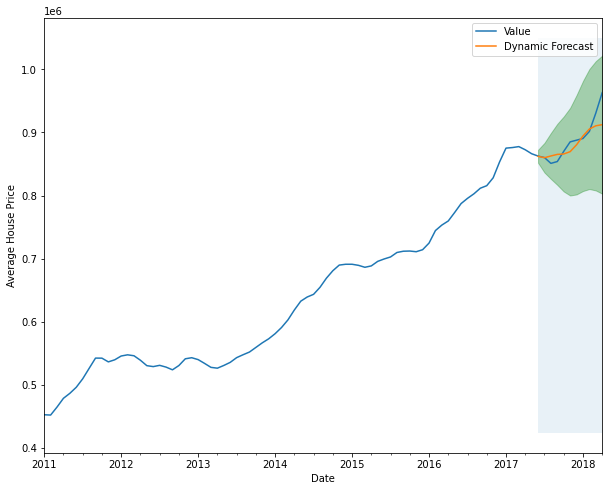

Accuracy Rate for 11203  is:  98.71634485492673 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  862189.190272  862600.0    410.809728    0.047625  99.952375
2017-07-01  860006.652887  860200.0    193.347113    0.022477  99.977523
2017-08-01  862755.250805  851000.0  11755.250805    1.381346  98.618654
2017-09-01  865263.631251  853900.0  11363.631251    1.330792  98.669208
2017-10-01  865898.117350  870000.0   4101.882650    0.471481  99.528519
2017-11-01  869553.515323  885100.0  15546.484677    1.756466  98.243534
2017-12-01  880484.217349  887800.0   7315.782651    0.824035  99.175965
2018-01-01  894386.337043  890500.0   3886.337043    0.436422  99.563578
2018-02-01  905482.175321  901700.0   3782.175321    0.419449  99.580551
2018-03-01  910626.275669  930700.0  20073.724331    2.156842  97.843158
2018-04-01  912407.838838  963200.0  50792.161162    5.273273  94.726727


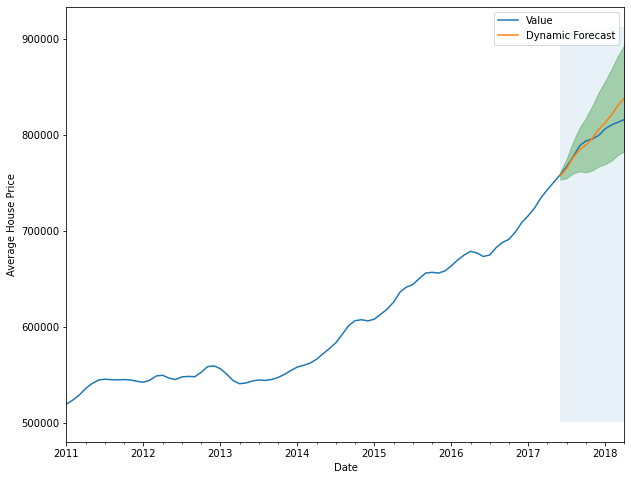

Accuracy Rate for 11204  is:  99.14076741494814 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  757613.764289  758800.0   1186.235711    0.156330  99.843670
2017-07-01  765297.981577  767300.0   2002.018423    0.260917  99.739083
2017-08-01  776674.042775  777300.0    625.957225    0.080530  99.919470
2017-09-01  784852.137247  788800.0   3947.862753    0.500490  99.499510
2017-10-01  789600.462193  793900.0   4299.537807    0.541572  99.458428
2017-11-01  796852.653460  796000.0    852.653460    0.107117  99.892883
2017-12-01  805963.601973  799700.0   6263.601973    0.783244  99.216756
2018-01-01  813054.574451  806600.0   6454.574451    0.800220  99.199780
2018-02-01  821160.767870  810600.0  10560.767870    1.302833  98.697167
2018-03-01  830989.245282  813400.0  17589.245282    2.162435  97.837565
2018-04-01  838693.411114  816200.0  22493.411114    2.755870  97.244130


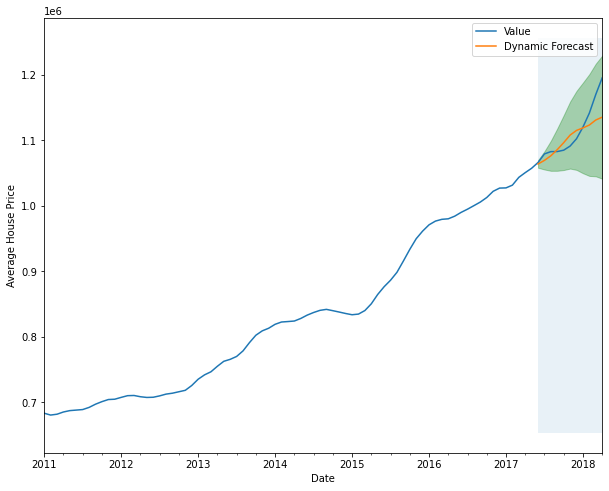

Accuracy Rate for 11205  is:  98.56193602609336 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  1.063825e+06  1066100.0   2275.026965    0.213397  99.786603
2017-07-01  1.069364e+06  1079200.0   9835.638182    0.911382  99.088618
2017-08-01  1.076381e+06  1082700.0   6318.965711    0.583630  99.416370
2017-09-01  1.085807e+06  1082800.0   3006.875934    0.277694  99.722306
2017-10-01  1.096407e+06  1084900.0  11507.124506    1.060662  98.939338
2017-11-01  1.107983e+06  1091200.0  16782.941439    1.538026  98.461974
2017-12-01  1.115099e+06  1102400.0  12698.836167    1.151926  98.848074
2018-01-01  1.118880e+06  1120200.0   1320.256128    0.117859  99.882141
2018-02-01  1.123330e+06  1141600.0  18270.265260    1.600409  98.399591
2018-03-01  1.130976e+06  1170000.0  39023.806105    3.335368  96.664632
2018-04-01  1.135291e+06  1195400.0  60108.883798    5.028349  94.971651


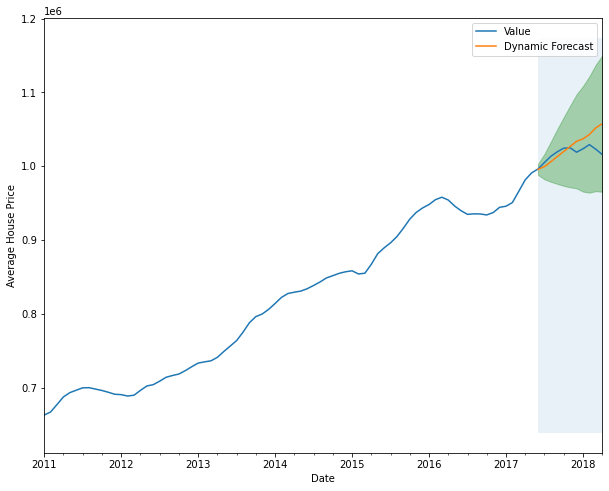

Accuracy Rate for 11208  is:  98.76287103775995 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  9.956309e+05   996200.0    569.126028    0.057130  99.942870
2017-07-01  9.994490e+05  1005000.0   5551.033014    0.552342  99.447658
2017-08-01  1.006027e+06  1013400.0   7373.257137    0.727576  99.272424
2017-09-01  1.013126e+06  1019500.0   6374.103515    0.625219  99.374781
2017-10-01  1.019808e+06  1024400.0   4592.263914    0.448288  99.551712
2017-11-01  1.026676e+06  1024900.0   1776.193462    0.173304  99.826696
2017-12-01  1.033612e+06  1018900.0  14711.768575    1.443887  98.556113
2018-01-01  1.037027e+06  1023500.0  13526.824136    1.321624  98.678376
2018-02-01  1.042889e+06  1029200.0  13688.655424    1.330029  98.669971
2018-03-01  1.051884e+06  1023000.0  28884.306045    2.823490  97.176510
2018-04-01  1.057504e+06  1015800.0  41703.969860    4.105530  95.894470


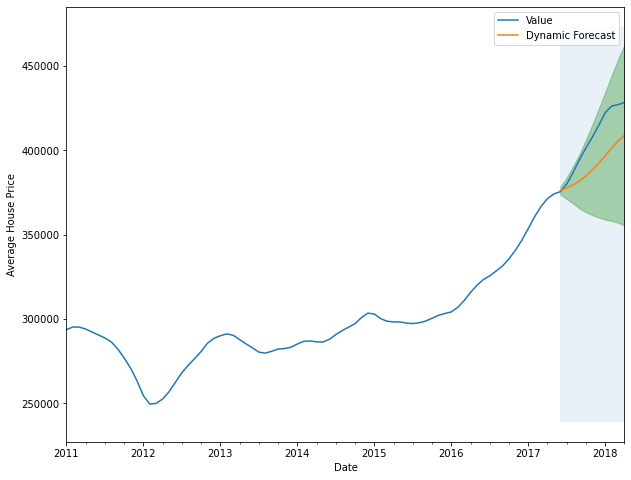

Accuracy Rate for 11209  is:  96.20511359544835 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  376167.555696  375500.0    667.555696    0.177778  99.822222
2017-07-01  377586.062631  380000.0   2413.937369    0.635247  99.364753
2017-08-01  379595.215276  387000.0   7404.784724    1.913381  98.086619
2017-09-01  381774.872194  394600.0  12825.127806    3.250159  96.749841
2017-10-01  384817.928281  401500.0  16682.071719    4.154937  95.845063
2017-11-01  388521.780746  407900.0  19378.219254    4.750728  95.249272
2017-12-01  392496.463527  414900.0  22403.536473    5.399744  94.600256
2018-01-01  396789.660896  422300.0  25510.339104    6.040810  93.959190
2018-02-01  401332.261251  426300.0  24967.738749    5.856847  94.143153
2018-03-01  405548.323416  427100.0  21551.676584    5.046049  94.953951
2018-04-01  409044.582409  428400.0  19355.417591    4.518071  95.481929


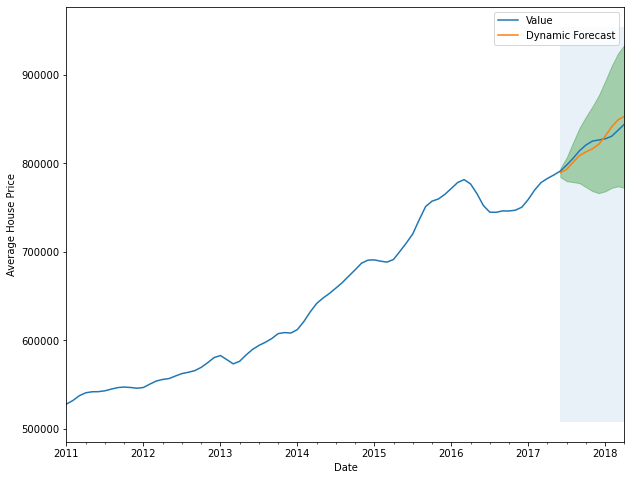

Accuracy Rate for 11210  is:  99.20478820202247 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  789288.708899  791200.0   1911.291101    0.241569  99.758431
2017-07-01  793174.329938  798000.0   4825.670062    0.604721  99.395279
2017-08-01  801160.470121  805700.0   4539.529879    0.563427  99.436573
2017-09-01  808781.527091  814200.0   5418.472909    0.665497  99.334503
2017-10-01  812798.037660  820600.0   7801.962340    0.950763  99.049237
2017-11-01  816327.895967  825000.0   8672.104033    1.051164  98.948836
2017-12-01  821414.261603  826300.0   4885.738397    0.591279  99.408721
2018-01-01  830539.518324  827600.0   2939.518324    0.355186  99.644814
2018-02-01  841005.997632  830500.0  10505.997632    1.265021  98.734979
2018-03-01  848995.766292  837300.0  11695.766292    1.396843  98.603157
2018-04-01  853063.171159  844100.0   8963.171159    1.061861  98.938139


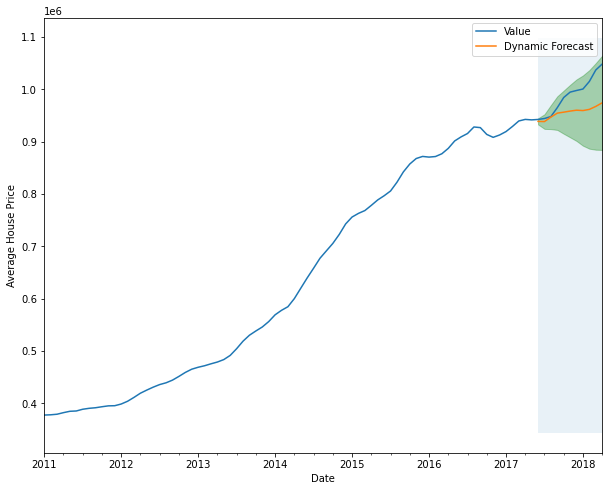

Accuracy Rate for 11211  is:  96.76033998877993 %
               Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  938988.661196   942700.0   3711.338804    0.393692  99.606308
2017-07-01  938666.425496   944500.0   5833.574504    0.617636  99.382364
2017-08-01  947199.258808   948200.0   1000.741192    0.105541  99.894459
2017-09-01  954806.032667   965300.0  10493.967333    1.087120  98.912880
2017-10-01  956645.476629   984700.0  28054.523371    2.849043  97.150957
2017-11-01  958716.743329   995000.0  36283.256671    3.646558  96.353442
2017-12-01  960422.504037   998100.0  37677.495963    3.774922  96.225078
2018-01-01  959700.950333  1000900.0  41199.049667    4.116200  95.883800
2018-02-01  961964.164951  1015400.0  53435.835049    5.262540  94.737460
2018-03-01  967646.551219  1037300.0  69653.448781    6.714880  93.285120
2018-04-01  974576.554931  1048700.0  74123.445069    7.068127  92.931873


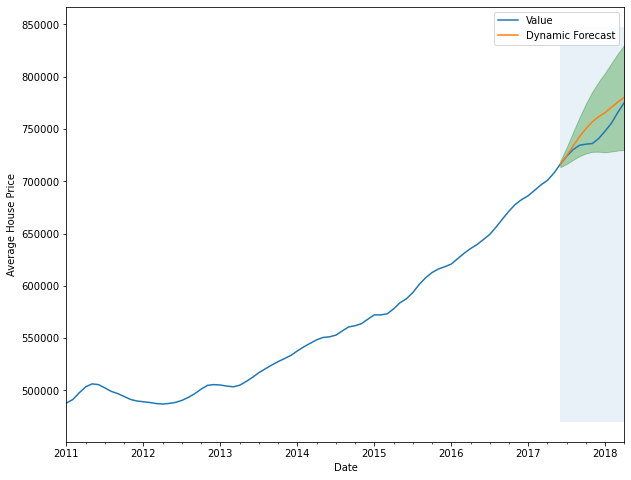

Accuracy Rate for 11212  is:  98.58028023467072 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  716494.380842  716300.0    194.380842    0.027137  99.972863
2017-07-01  724607.186758  724100.0    507.186758    0.070044  99.929956
2017-08-01  733824.118313  730300.0   3524.118313    0.482558  99.517442
2017-09-01  742635.402590  734500.0   8135.402590    1.107611  98.892389
2017-10-01  750436.369103  735500.0  14936.369103    2.030778  97.969222
2017-11-01  756964.783678  736100.0  20864.783678    2.834504  97.165496
2017-12-01  761807.207428  741000.0  20807.207428    2.807990  97.192010
2018-01-01  765781.150208  748100.0  17681.150208    2.363474  97.636526
2018-02-01  770877.567451  755800.0  15077.567451    1.994915  98.005085
2018-03-01  775906.931108  766200.0   9706.931108    1.266893  98.733107
2018-04-01  780393.519694  775500.0   4893.519694    0.631015  99.368985


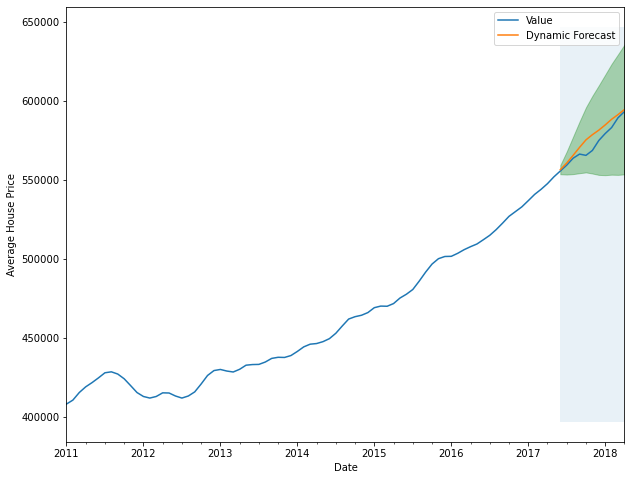

Accuracy Rate for 11214  is:  99.22797131648825 %
               Prediction    Actual   |Pred-Act|  Error rate   Accuracy
2017-06-01  556547.996776  555700.0   847.996776    0.152600  99.847400
2017-07-01  560743.196796  559400.0  1343.196796    0.240114  99.759886
2017-08-01  565614.789414  563800.0  1814.789414    0.321885  99.678115
2017-09-01  570652.608478  566400.0  4252.608478    0.750814  99.249186
2017-10-01  575402.647797  565600.0  9802.647797    1.733141  98.266859
2017-11-01  578679.145696  568700.0  9979.145696    1.754729  98.245271
2017-12-01  581540.428685  575000.0  6540.428685    1.137466  98.862534
2018-01-01  584858.221906  579400.0  5458.221906    0.942047  99.057953
2018-02-01  588439.972417  583200.0  5239.972417    0.898486  99.101514
2018-03-01  591391.698889  589400.0  1991.698889    0.337920  99.662080
2018-04-01  594623.729587  593300.0  1323.729587    0.223113  99.776887


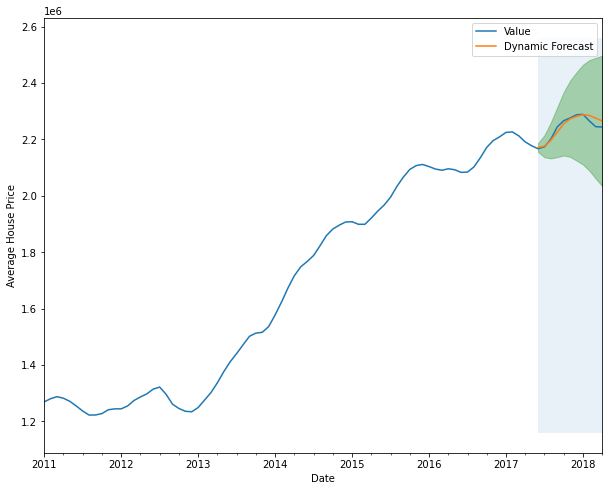

Accuracy Rate for 11215  is:  99.50985846190356 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  2.171082e+06  2166800.0   4282.079739    0.197622  99.802378
2017-07-01  2.175799e+06  2173600.0   2199.137282    0.101175  99.898825
2017-08-01  2.196698e+06  2201100.0   4402.476893    0.200013  99.799987
2017-09-01  2.225761e+06  2244400.0  18639.052923    0.830469  99.169531
2017-10-01  2.255342e+06  2266100.0  10758.398080    0.474754  99.525246
2017-11-01  2.272961e+06  2275800.0   2839.212216    0.124757  99.875243
2017-12-01  2.281527e+06  2287100.0   5573.128258    0.243677  99.756323
2018-01-01  2.287593e+06  2288900.0   1306.718205    0.057089  99.942911
2018-02-01  2.284845e+06  2265300.0  19545.028283    0.862801  99.137199
2018-03-01  2.274973e+06  2244900.0  30072.727258    1.339602  98.660398
2018-04-01  2.265432e+06  2243900.0  21532.427468    0.959598  99.040402


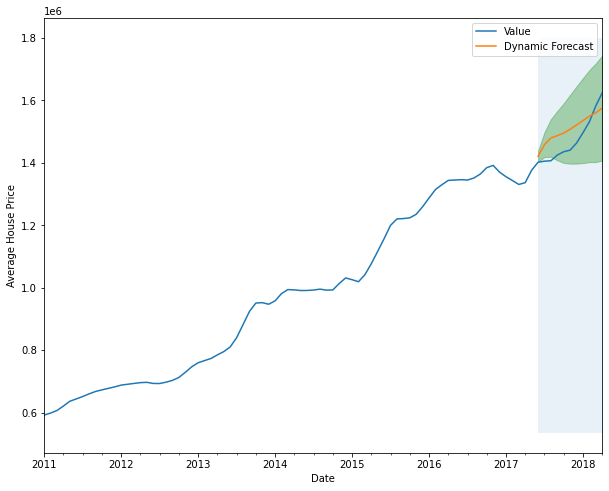

Accuracy Rate for 11216  is:  96.76169873389254 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  1.420804e+06  1401700.0  19103.781280    1.362901  98.637099
2017-07-01  1.458191e+06  1405100.0  53091.485041    3.778484  96.221516
2017-08-01  1.479458e+06  1406400.0  73057.971238    5.194679  94.805321
2017-09-01  1.486782e+06  1424700.0  62081.837973    4.357538  95.642462
2017-10-01  1.494941e+06  1435300.0  59640.902211    4.155292  95.844708
2017-11-01  1.507370e+06  1440500.0  66869.589498    4.642110  95.357890
2017-12-01  1.520980e+06  1463100.0  57879.951175    3.955981  96.044019
2018-01-01  1.535029e+06  1496100.0  38928.711286    2.602013  97.397987
2018-02-01  1.549361e+06  1531100.0  18261.118487    1.192680  98.807320
2018-03-01  1.560104e+06  1581900.0  21795.610658    1.377812  98.622188
2018-04-01  1.574959e+06  1623700.0  48740.636083    3.001825  96.998175


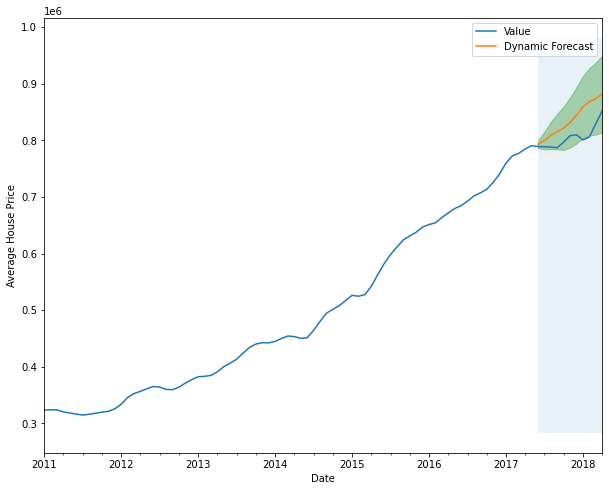

Accuracy Rate for 11217  is:  96.15740367575778 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  792996.928205  789000.0   3996.928205    0.506582  99.493418
2017-07-01  799940.871663  788800.0  11140.871663    1.412382  98.587618
2017-08-01  808886.656348  788000.0  20886.656348    2.650591  97.349409
2017-09-01  815532.187980  787100.0  28432.187980    3.612271  96.387729
2017-10-01  821667.884652  797100.0  24567.884652    3.082158  96.917842
2017-11-01  831690.096691  808400.0  23290.096691    2.881011  97.118989
2017-12-01  844371.166886  809800.0  34571.166886    4.269099  95.730901
2018-01-01  859069.900375  800800.0  58269.900375    7.276461  92.723539
2018-02-01  868365.388752  806100.0  62265.388752    7.724276  92.275724
2018-03-01  873840.672830  829200.0  44640.672830    5.383583  94.616417
2018-04-01  881876.035618  852300.0  29576.035618    3.470144  96.529856


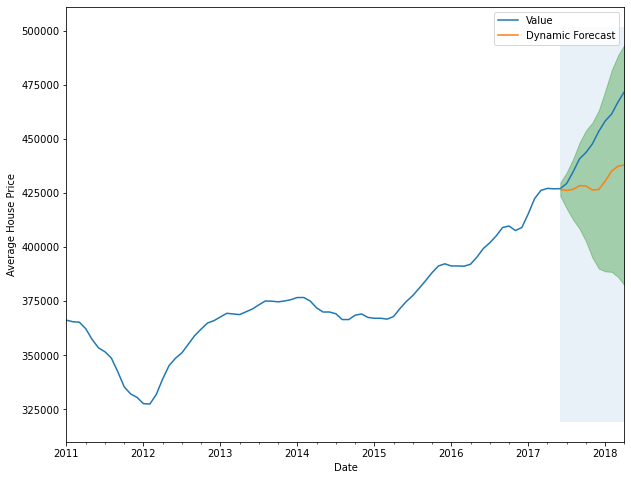

Accuracy Rate for 11218  is:  95.90115929141315 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  426755.962496  427100.0    344.037504    0.080552  99.919448
2017-07-01  426227.464020  429500.0   3272.535980    0.761941  99.238059
2017-08-01  426767.449064  434900.0   8132.550936    1.869982  98.130018
2017-09-01  428440.754449  440900.0  12459.245551    2.825867  97.174133
2017-10-01  428353.989153  443800.0  15446.010847    3.480399  96.519601
2017-11-01  426404.128684  447800.0  21395.871316    4.777997  95.222003
2017-12-01  426716.212582  453600.0  26883.787418    5.926761  94.073239
2018-01-01  430510.707714  458400.0  27889.292286    6.084052  93.915948
2018-02-01  435182.262512  461600.0  26417.737488    5.723080  94.276920
2018-03-01  437492.525496  467200.0  29707.474504    6.358620  93.641380
2018-04-01  438025.451649  472000.0  33974.548351    7.197998  92.802002


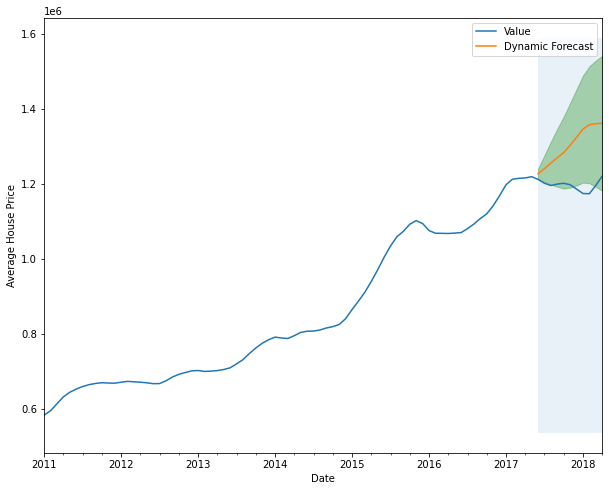

Accuracy Rate for 11219  is:  91.07726241974532 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  1.226987e+06  1212200.0   14786.756928    1.219828  98.780172
2017-07-01  1.240974e+06  1201800.0   39173.723715    3.259588  96.740412
2017-08-01  1.255483e+06  1195800.0   59682.922386    4.991046  95.008954
2017-09-01  1.270022e+06  1199700.0   70322.006422    5.861633  94.138367
2017-10-01  1.283624e+06  1201800.0   81824.483319    6.808494  93.191506
2017-11-01  1.303022e+06  1198000.0  105021.513570    8.766403  91.233597
2017-12-01  1.324326e+06  1186400.0  137926.138941   11.625602  88.374398
2018-01-01  1.346257e+06  1174500.0  171757.186348   14.623856  85.376144
2018-02-01  1.357969e+06  1173900.0  184068.992024   15.680125  84.319875
2018-03-01  1.360537e+06  1196100.0  164437.041112   13.747767  86.252233
2018-04-01  1.362107e+06  1220900.0  141206.509078   11.565772  88.434228


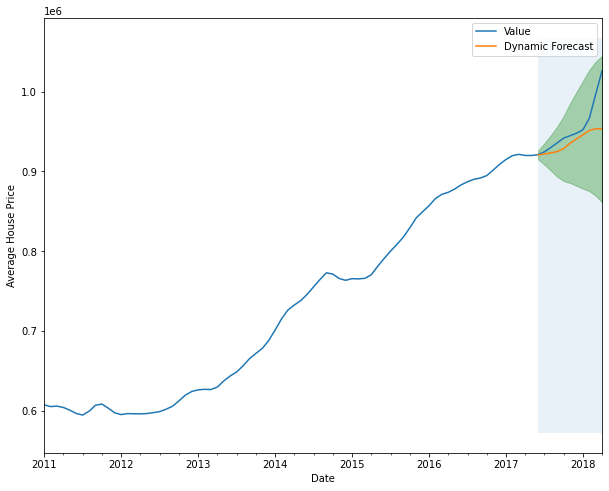

Accuracy Rate for 11220  is:  98.2588082774382 %
               Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  920671.919947   921000.0    328.080053    0.035622  99.964378
2017-07-01  921821.009098   924500.0   2678.990902    0.289777  99.710223
2017-08-01  923133.939308   930000.0   6866.060692    0.738286  99.261714
2017-09-01  924745.550152   935800.0  11054.449848    1.181283  98.818717
2017-10-01  928625.080898   941700.0  13074.919102    1.388438  98.611562
2017-11-01  935369.943125   944700.0   9330.056875    0.987621  99.012379
2017-12-01  940743.409986   947800.0   7056.590014    0.744523  99.255477
2018-01-01  945857.118724   952100.0   6242.881276    0.655696  99.344304
2018-02-01  951174.953392   966600.0  15425.046608    1.595805  98.404195
2018-03-01  953401.714235   997000.0  43598.285765    4.372947  95.627053
2018-04-01  953063.512232  1026600.0  73536.487768    7.163110  92.836890


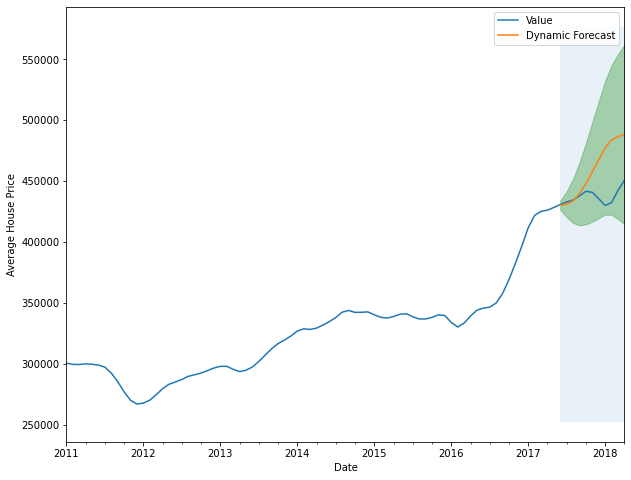

Accuracy Rate for 11221  is:  94.98955527843337 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  430160.875591  430800.0    639.124409    0.148358  99.851642
2017-07-01  430990.908126  432900.0   1909.091874    0.441001  99.558999
2017-08-01  433781.082793  434400.0    618.917207    0.142476  99.857524
2017-09-01  439606.996140  437800.0   1806.996140    0.412745  99.587255
2017-10-01  447907.768063  441600.0   6307.768063    1.428390  98.571610
2017-11-01  457652.319806  440700.0  16952.319806    3.846680  96.153320
2017-12-01  467657.056281  435400.0  32257.056281    7.408603  92.591397
2018-01-01  477359.046219  429900.0  47459.046219   11.039555  88.960445
2018-02-01  483807.922709  432300.0  51507.922709   11.914856  88.085144
2018-03-01  486530.194687  442400.0  44130.194687    9.975180  90.024820
2018-04-01  488256.866025  450600.0  37656.866025    8.357050  91.642950


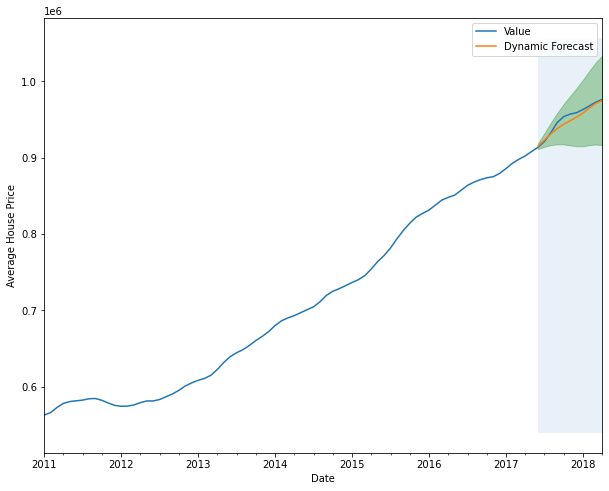

Accuracy Rate for 11222  is:  99.54153790761679 %
               Prediction    Actual   |Pred-Act|  Error rate   Accuracy
2017-06-01  915224.542636  913800.0  1424.542636    0.155892  99.844108
2017-07-01  923214.836657  921200.0  2014.836657    0.218719  99.781281
2017-08-01  931222.820892  932800.0  1577.179108    0.169080  99.830920
2017-09-01  938127.973683  946200.0  8072.026317    0.853099  99.146901
2017-10-01  943914.178828  953800.0  9885.821172    1.036467  98.963533
2017-11-01  948433.684574  957100.0  8666.315426    0.905476  99.094524
2017-12-01  953033.991642  958900.0  5866.008358    0.611743  99.388257
2018-01-01  958483.058687  963200.0  4716.941313    0.489716  99.510284
2018-02-01  965147.820070  967900.0  2752.179930    0.284345  99.715655
2018-03-01  971015.626327  972800.0  1784.373673    0.183427  99.816573
2018-04-01  975080.706954  976400.0  1319.293046    0.135118  99.864882


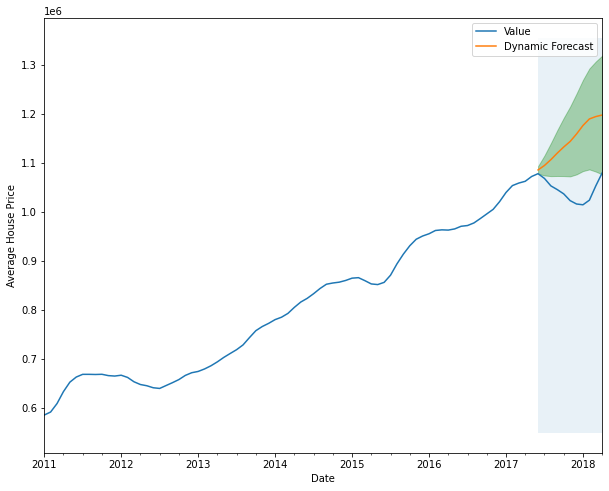

Accuracy Rate for 11223  is:  90.26133152643712 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  1.085569e+06  1078000.0    7569.364931    0.702167  99.297833
2017-07-01  1.094747e+06  1068200.0   26546.558081    2.485167  97.514833
2017-08-01  1.106636e+06  1053000.0   53635.775647    5.093616  94.906384
2017-09-01  1.120043e+06  1045400.0   74643.010135    7.140139  92.859861
2017-10-01  1.132453e+06  1036700.0   95753.046958    9.236331  90.763669
2017-11-01  1.143731e+06  1022900.0  120830.530248   11.812546  88.187454
2017-12-01  1.159052e+06  1016000.0  143051.936546   14.079915  85.920085
2018-01-01  1.176364e+06  1014400.0  161963.563319   15.966440  84.033560
2018-02-01  1.189758e+06  1023800.0  165957.957445   16.209998  83.790002
2018-03-01  1.194630e+06  1053000.0  141630.422525   13.450183  86.549817
2018-04-01  1.197804e+06  1079600.0  118203.802897   10.948852  89.051148


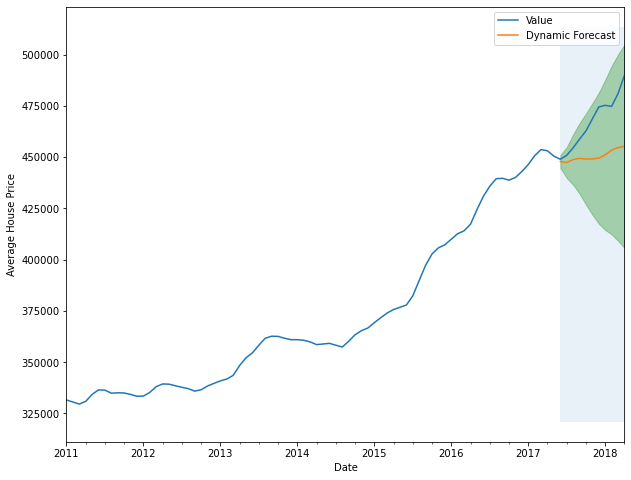

Accuracy Rate for 11224  is:  96.46736933346985 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  447883.217160  449000.0   1116.782840    0.248727  99.751273
2017-07-01  447401.878396  450900.0   3498.121604    0.775809  99.224191
2017-08-01  448834.920891  454600.0   5765.079109    1.268165  98.731835
2017-09-01  449397.545380  458800.0   9402.454620    2.049358  97.950642
2017-10-01  449117.488740  462800.0  13682.511260    2.956463  97.043537
2017-11-01  449115.528186  468700.0  19584.471814    4.178466  95.821534
2017-12-01  449521.853414  474500.0  24978.146586    5.264098  94.735902
2018-01-01  451131.834116  475300.0  24168.165884    5.084823  94.915177
2018-02-01  453438.863266  474800.0  21361.136734    4.498976  95.501024
2018-03-01  454687.124804  481000.0  26312.875196    5.470452  94.529548
2018-04-01  455295.426273  489900.0  34604.573727    7.063599  92.936401


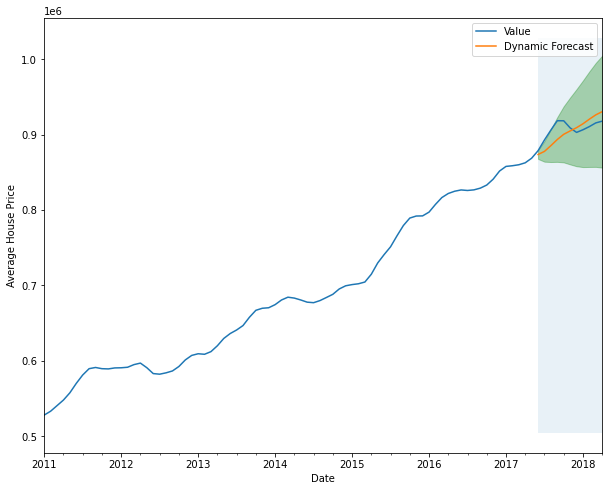

Accuracy Rate for 11226  is:  98.65066729555411 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  873705.042276  878700.0   4994.957724    0.568449  99.431551
2017-07-01  877821.386199  893000.0  15178.613801    1.699733  98.300267
2017-08-01  885458.111630  906100.0  20641.888370    2.278103  97.721897
2017-09-01  893580.412455  918500.0  24919.587545    2.713074  97.286926
2017-10-01  900472.273546  918400.0  17927.726454    1.952061  98.047939
2017-11-01  904938.374991  909000.0   4061.625009    0.446823  99.553177
2017-12-01  909245.506759  903000.0   6245.506759    0.691640  99.308360
2018-01-01  914432.844233  906500.0   7932.844233    0.875107  99.124893
2018-02-01  920541.685461  910700.0   9841.685461    1.080673  98.919327
2018-03-01  926242.213753  915600.0  10642.213753    1.162321  98.837679
2018-04-01  930518.156438  917900.0  12618.156438    1.374677  98.625323


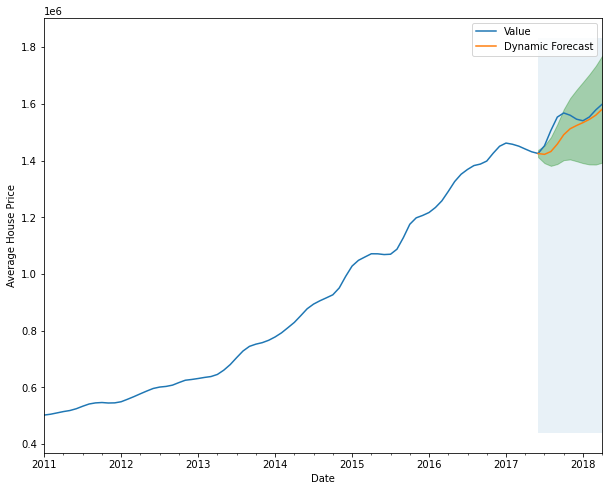

Accuracy Rate for 11228  is:  97.65357233991799 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  1.424717e+06  1424800.0     82.579880    0.005796  99.994204
2017-07-01  1.421730e+06  1452000.0  30270.481165    2.084744  97.915256
2017-08-01  1.431732e+06  1506100.0  74368.065613    4.937791  95.062209
2017-09-01  1.457835e+06  1553100.0  95265.098497    6.133868  93.866132
2017-10-01  1.490950e+06  1567700.0  76750.432100    4.895735  95.104265
2017-11-01  1.511972e+06  1559700.0  47728.087191    3.060081  96.939919
2017-12-01  1.523467e+06  1545700.0  22233.074574    1.438382  98.561618
2018-01-01  1.533565e+06  1540200.0   6635.142491    0.430797  99.569203
2018-02-01  1.545012e+06  1553600.0   8587.500560    0.552748  99.447252
2018-03-01  1.559856e+06  1578400.0  18543.949643    1.174857  98.825143
2018-04-01  1.581180e+06  1598700.0  17520.226976    1.095905  98.904095


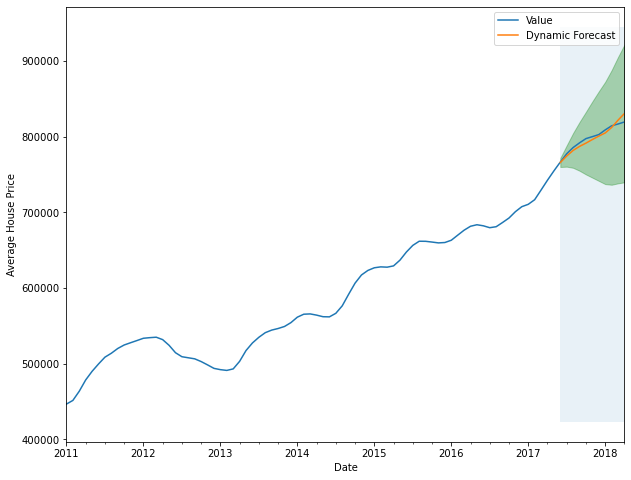

Accuracy Rate for 11229  is:  99.47516900849747 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  766022.066246  766600.0    577.933754    0.075389  99.924611
2017-07-01  774588.268406  777600.0   3011.731594    0.387311  99.612689
2017-08-01  781996.646865  785800.0   3803.353135    0.484010  99.515990
2017-09-01  787306.096429  792000.0   4693.903571    0.592665  99.407335
2017-10-01  791637.846895  797600.0   5962.153105    0.747512  99.252488
2017-11-01  796387.057091  800200.0   3812.942909    0.476499  99.523501
2017-12-01  800877.366373  802900.0   2022.633627    0.251916  99.748084
2018-01-01  805063.113290  809100.0   4036.886710    0.498935  99.501065
2018-02-01  812310.199777  814500.0   2189.800223    0.268852  99.731148
2018-03-01  821978.151750  816900.0   5078.151750    0.621637  99.378363
2018-04-01  830815.527429  819600.0  11215.527429    1.368415  98.631585


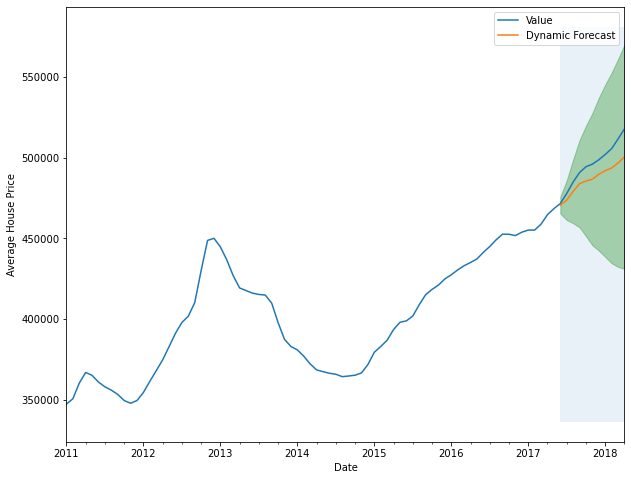

Accuracy Rate for 11230  is:  98.2011839243525 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  470573.752073  471600.0   1026.247927    0.217610  99.782390
2017-07-01  473665.817288  477800.0   4134.182712    0.865254  99.134746
2017-08-01  479106.704132  484900.0   5793.295868    1.194740  98.805260
2017-09-01  483884.452088  490800.0   6915.547912    1.409036  98.590964
2017-10-01  485559.988309  494400.0   8840.011691    1.788028  98.211972
2017-11-01  486653.401423  496000.0   9346.598577    1.884395  98.115605
2017-12-01  489735.890604  498700.0   8964.109396    1.797495  98.202505
2018-01-01  491927.679213  502000.0  10072.320787    2.006438  97.993562
2018-02-01  493621.492687  505600.0  11978.507313    2.369167  97.630833
2018-03-01  496723.926968  511600.0  14876.073032    2.907755  97.092245
2018-04-01  500565.583346  517900.0  17334.416654    3.347059  96.652941


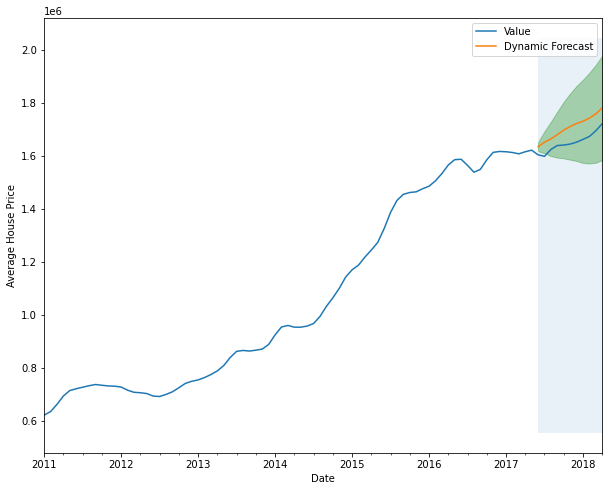

Accuracy Rate for 11231  is:  96.60016212688078 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  1.634426e+06  1603600.0  30825.711551    1.922282  98.077718
2017-07-01  1.650979e+06  1598000.0  52978.612072    3.315307  96.684693
2017-08-01  1.663520e+06  1623800.0  39720.095653    2.446120  97.553880
2017-09-01  1.679710e+06  1638700.0  41010.144214    2.502602  97.497398
2017-10-01  1.696770e+06  1640400.0  56370.027888    3.436359  96.563641
2017-11-01  1.710147e+06  1644100.0  66047.263986    4.017229  95.982771
2017-12-01  1.721808e+06  1651200.0  70607.961321    4.276160  95.723840
2018-01-01  1.729894e+06  1661800.0  68093.722869    4.097588  95.902412
2018-02-01  1.742045e+06  1672800.0  69245.205430    4.139479  95.860521
2018-03-01  1.758173e+06  1694000.0  64173.305601    3.788271  96.211729
2018-04-01  1.780595e+06  1721100.0  59495.308166    3.456819  96.543181


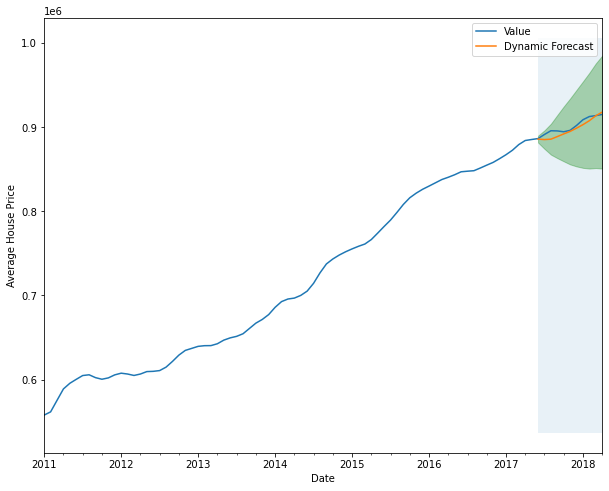

Accuracy Rate for 11233  is:  99.55383343182633 %
               Prediction    Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  885973.330790  886600.0    626.669210    0.070682  99.929318
2017-07-01  885409.840526  891500.0   6090.159474    0.683136  99.316864
2017-08-01  885882.700626  895900.0  10017.299374    1.118127  98.881873
2017-09-01  888961.458928  895700.0   6738.541072    0.752321  99.247679
2017-10-01  892145.474319  894700.0   2554.525681    0.285518  99.714482
2017-11-01  895111.210915  896400.0   1288.789085    0.143774  99.856226
2017-12-01  898990.540067  902200.0   3209.459933    0.355737  99.644263
2018-01-01  903171.164809  909000.0   5828.835191    0.641236  99.358764
2018-02-01  907879.715616  912800.0   4920.284384    0.539032  99.460968
2018-03-01  913751.835681  913900.0    148.164319    0.016212  99.983788
2018-04-01  918064.724954  915300.0   2764.724954    0.302057  99.697943


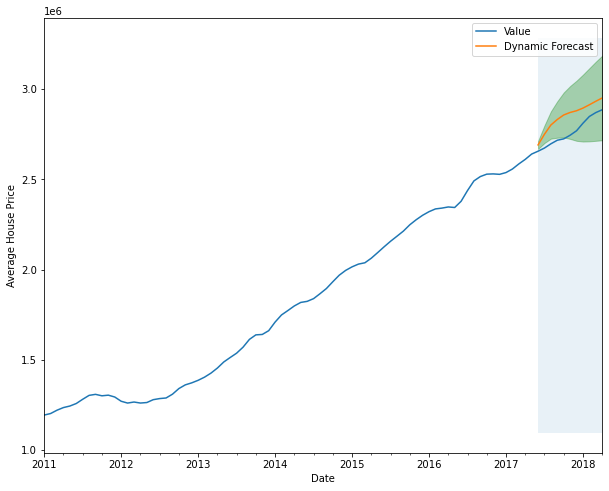

Accuracy Rate for 11234  is:  96.77894783548173 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  2.690523e+06  2655700.0   34822.803612    1.311248  98.688752
2017-07-01  2.749882e+06  2673300.0   76582.080698    2.864702  97.135298
2017-08-01  2.800852e+06  2696700.0  104152.236905    3.862211  96.137789
2017-09-01  2.831441e+06  2716500.0  114940.944991    4.231215  95.768785
2017-10-01  2.856384e+06  2724000.0  132384.127035    4.859917  95.140083
2017-11-01  2.870320e+06  2744300.0  126020.457276    4.592080  95.407920
2017-12-01  2.879811e+06  2768900.0  110911.484406    4.005615  95.994385
2018-01-01  2.894473e+06  2810700.0   83772.591786    2.980489  97.019511
2018-02-01  2.912939e+06  2848100.0   64838.671574    2.276559  97.723441
2018-03-01  2.932304e+06  2869600.0   62703.751636    2.185104  97.814896
2018-04-01  2.950578e+06  2885300.0   65278.035980    2.262435  97.737565


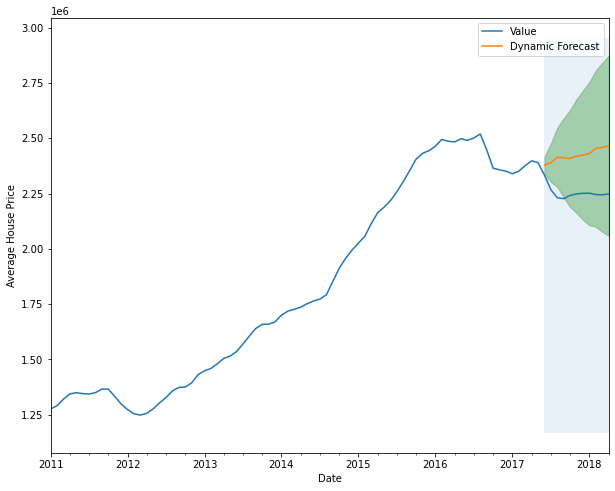

Accuracy Rate for 11235  is:  92.46152001564751 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  2.378261e+06  2333600.0   44661.220280    1.913834  98.086166
2017-07-01  2.389621e+06  2267400.0  122221.220311    5.390369  94.609631
2017-08-01  2.413603e+06  2230800.0  182803.386771    8.194522  91.805478
2017-09-01  2.411430e+06  2226800.0  184629.650619    8.291254  91.708746
2017-10-01  2.408323e+06  2241400.0  166923.342260    7.447280  92.552720
2017-11-01  2.419094e+06  2248400.0  170694.218136    7.591808  92.408192
2017-12-01  2.423194e+06  2251000.0  172194.492267    7.649689  92.350311
2018-01-01  2.430412e+06  2251600.0  178811.677534    7.941538  92.058462
2018-02-01  2.453222e+06  2245300.0  207922.052234    9.260324  90.739676
2018-03-01  2.458529e+06  2243700.0  214828.764666    9.574754  90.425246
2018-04-01  2.465773e+06  2248400.0  217373.236122    9.667908  90.332092


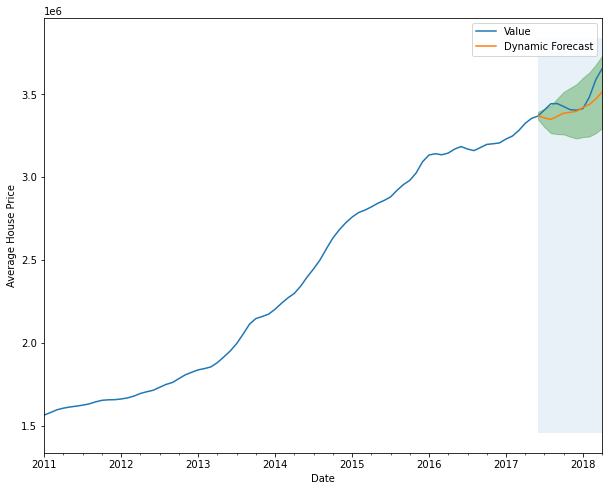

Accuracy Rate for 11236  is:  98.46376496381922 %
              Prediction     Actual     |Pred-Act|  Error rate   Accuracy
2017-06-01  3.371162e+06  3368600.0    2562.419393    0.076068  99.923932
2017-07-01  3.357180e+06  3405900.0   48719.785386    1.430453  98.569547
2017-08-01  3.348501e+06  3442900.0   94399.305747    2.741854  97.258146
2017-09-01  3.367158e+06  3443800.0   76642.461002    2.225520  97.774480
2017-10-01  3.386331e+06  3426000.0   39669.445984    1.157894  98.842106
2017-11-01  3.391019e+06  3407000.0   15981.466394    0.469077  99.530923
2017-12-01  3.397058e+06  3404100.0    7041.759926    0.206861  99.793139
2018-01-01  3.420689e+06  3413800.0    6888.953468    0.201797  99.798203
2018-02-01  3.438468e+06  3482900.0   44432.373314    1.275729  98.724271
2018-03-01  3.471740e+06  3588100.0  116359.866371    3.242938  96.757062
2018-04-01  3.514498e+06  3656000.0  141501.581843    3.870393  96.129607


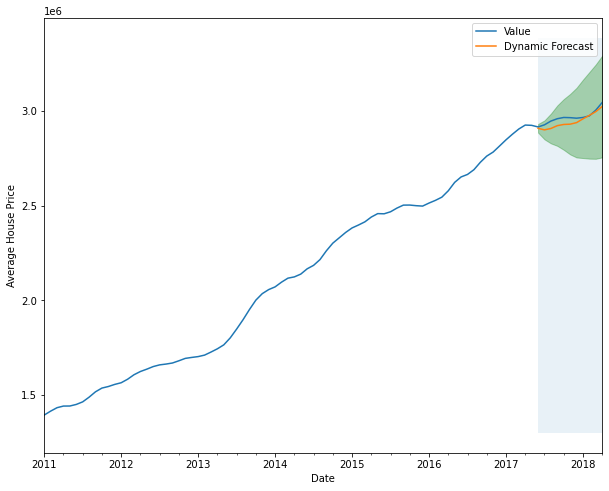

Accuracy Rate for 11238  is:  99.25432487327431 %
              Prediction     Actual    |Pred-Act|  Error rate   Accuracy
2017-06-01  2.908104e+06  2915300.0   7195.605534    0.246822  99.753178
2017-07-01  2.899936e+06  2926600.0  26664.268145    0.911101  99.088899
2017-08-01  2.907220e+06  2946300.0  39080.010953    1.326410  98.673590
2017-09-01  2.922160e+06  2958800.0  36639.710318    1.238330  98.761670
2017-10-01  2.928479e+06  2965400.0  36921.218739    1.245067  98.754933
2017-11-01  2.929989e+06  2964400.0  34410.817244    1.160802  98.839198
2017-12-01  2.938164e+06  2961600.0  23435.917351    0.791326  99.208674
2018-01-01  2.958045e+06  2965300.0   7254.697118    0.244653  99.755347
2018-02-01  2.976497e+06  2974000.0   2496.589344    0.083947  99.916053
2018-03-01  2.996268e+06  3004000.0   7731.623963    0.257378  99.742622
2018-04-01  3.023292e+06  3044500.0  21207.701981    0.696591  99.303409


In [342]:
#import warnings

#Make Prediction post 2016 and compare with real values
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []
accu=[]
for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
    fore=0
    pred=0
    ARIMA_MODEL = sm.tsa.SARIMAX(df,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)
                                
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    #get dynamic predictions starting 2017-06-01
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int() #confidence interval
    #basically range of estimates for unknown parameters
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = df['2017-06-01':]['Value']
    
    #print(zip_forecasted,zip_truth)
    fore=zip_forecasted+fore
    pred=zip_truth+pred
    #act.append(zip_truth)
    #pred.append(zip_forecasted)
    #diff.append(zip_truth-zip_forecasted)
    #acc.append(100-((zip_truth-zip_forecasted)/zip_truth)*100)
    #Plot the dynamic forecast with confidence intervals as above
    
    ax = df['2011':].plot(label='observed', figsize=(10, 8))
    pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
    
    ax.fill_between(pred_dynamic_conf.index,
                    pred_dynamic_conf.iloc[:, 0],
                    pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-06-01'), zip_forecasted.index[-1], alpha=.1, zorder=-1)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Average House Price')

    plt.legend()
    plt.show()
    
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    #print('The Mean Squared Error of our forecasts is {}'.format(round(sqrt_mse, 2))) 
    
    sr=(zip_forecasted)
    sr=sr.to_frame()
    sr2=(zip_truth)
    sr2=sr2.to_frame()
    #print(sr2)
    sr3=abs(zip_forecasted-zip_truth)
    sr3=sr3.to_frame()
    
    
    sr4=abs((zip_forecasted-zip_truth)/zip_truth)*100
    sr4=sr4.to_frame()
    
    
    sr5=100-abs((zip_forecasted-zip_truth)/zip_truth)*100
    sr5=sr5.to_frame()
    
    result = pd.concat([sr, sr2,sr3,sr4,sr5], axis=1)
    
    result.columns =['Prediction', 'Actual', '|Pred-Act|', 'Error rate',"Accuracy"]
    print("Accuracy Rate for", name ," is: ",result["Accuracy"].mean(),"%")
    accu.append(result["Accuracy"].mean())
    print(result)
    #print("Accuracy is: ", (100-(abs(fore-pred))/fore).mean,"%")
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value
summary_table["Accuracy"]= accu


In [343]:
summary_table

,Zipcode,Sqrt_MSE,Accuracy
0,11203,18069.990182,98.716345
1,11204,9762.473937,99.140767
2,11205,23736.639606,98.561936
3,11208,17348.540338,98.762871
4,11209,17823.848024,96.205114
5,11210,7217.402520,99.204788
6,11211,41099.316911,96.760340
7,11212,12892.565045,98.580280
8,11214,5438.269256,99.227971
9,11215,14449.166452,99.509858


In [344]:
summary_table["Accuracy"].mean()

97.28205322043094